#Proyecto Poverty - Entrega Final

La pobreza a sido una de las mayores problematicas con las que los paises intentan lidiar constantemente, sin exito alguno, el fenomeno cada vez aumenta su magnitud y las consecuencias se visibilizan. En pro de estudiar el fenomeno para intentar entender un poco mas las posibles causas que provocan o empeoran este fenomeno se realizo el presente analisis, donde se analizo un dataset con multiples variables e indicadores de pobreza con el fin de intentar encontrar correlacion o causalidad alguno entre los mismos, el cual evidencia que si bien la pobreza no discrimina etnia, genero, lugar de residencia,etc. existen variables que aumentan notablemente la probabilidad que una persona sea pobre, lo cual nos invita a repensar la manera en la intentamos combatir la problematica y maneras de mitigarla, mas alla de la naturaleza economica del fenomeno tambien se convierte en un fenomeno social y cultural, que debemos identificar como tal para intentar resolverlo .
Debemos entender tambien las limitaciones del analisis, al estudiar un fenomeno socio-economico el contexto es indispensable, el momento en el cual se realizaron las encuestas, las mediciones, el lugar,etc. Mas alla de las mismas el analisis servira para estudiar de manera general el fenomeno y sera util a todo aquel interesado en aprender y estudiar en profundidad el fenomeno descrito, sean estudiantes, colaboradores de organizaciones, profesionales o  publico en general.

##Contexto
Estudiar si existen factores o variables que posean correlacion y/o causalidad con los indicadores de pobreza y medir el impacto de estas variables sobre la probabilidad de que una persona sea pobre, ademas entrenaremos modelos de Machine Learning de Clasificacion con la intencion de predecir, a partir de los datos, dos tipos de clases:

Cat_Pobre=1: Representa a las personas con altas probabilidades de estar en condiciones de pobreza, se establece para aquellas con mas del 60% de 
probabilidades ser pobres.

Cat_Pobre=0: Representa a aquellos individuos con probabilidades de ser pobres menores al 60%, esto no implica que no puedan estar en circunstancias de pobreza.

Establecemos la diferencia de clases alrededor del 60% de probabilidad de ser pobres con el fin de poder identificar los individuos con mayores probabilidades. 


##Preguntas de Interes
###Preguntas Principales
1- Existen factores que aumenten la probabilidad de que una persona sea pobre?​

2- Cual es su impacto?

###Preguntas Secundarias

1- Vivir en Zonas Urbanas o Rurales es una factor para la pobreza?​

2- El Nivel de Educación tiene relación?​

3- Es el Genero un condicionante ?​

4- La Edad puede tener alguna implicancia ?​

# Data Acquisition

Datos obtenidos del repositorio Kaggle tabulados en archivo 'csv', divididos en 2 archivos. El archivo train_values contiene 59 columnas con las variables dependientes del analisis y el archivo train_labels contiene una unica columna con el valor de la probabilidad de ser pobre por sujeto. Esto en una muestra de 12.600 individuos.

####Importacion de Librerias 

In [ ]:
#Tratamiento de Datos
import pandas as pd
import numpy as np
import numpy.random as nr
from numpy import mean
from numpy import std
#Graficos
import seaborn as sns
import matplotlib.pyplot as plt
#Preprocesado y Modelado
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Algortimos de Clasificacion
from sklearn.svm import SVC #Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #Random Forest
from xgboost import XGBClassifier
#Metricas - Algortimos de Clasificacion
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import metrics
#Hyperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


## Pre Processing 

In [ ]:
pob=pd.read_csv('train_values_wJZrCmI.csv')
prob_pob=pd.read_csv('train_labels.csv')

In [ ]:
pob

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,1
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,0
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,False,0,0,0
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,False,0,0,0
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,False,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,12595,C,True,50.0,False,True,P,Head,1.0,True,...,False,True,False,False,False,False,False,2,0,1
12596,12596,D,False,90.0,False,False,O,Head,0.0,True,...,False,False,False,False,False,False,False,0,0,0
12597,12597,J,False,52.0,True,False,X,Head,1.0,False,...,False,True,False,False,False,True,False,0,1,0
12598,12598,I,False,40.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,False,0,0,0


In [ ]:
#Analizamos si existen valores nulos
print(pob.isnull().sum())

row_id                                       0
country                                      0
is_urban                                     0
age                                          0
female                                       0
married                                      0
religion                                     0
relationship_to_hh_head                      0
education_level                            236
literacy                                     0
can_add                                      0
can_divide                                   0
can_calc_percents                            0
can_calc_compounding                         0
employed_last_year                           0
employment_category_last_year                0
employment_type_last_year                    0
share_hh_income_provided                   305
income_ag_livestock_last_year                0
income_friends_family_last_year              0
income_government_last_year                  0
income_own_bu

Realizamos la limpieza de las columnas de poseen valores nulos

In [ ]:
pob['bank_interest_rate'].fillna(0,inplace=True)

In [ ]:
pob['mm_interest_rate'].fillna(0,inplace=True)

In [ ]:
pob['mfi_interest_rate'].fillna(0,inplace=True)

In [ ]:
pob['other_fsp_interest_rate'].fillna(0,inplace=True)

In [ ]:
pob['education_level'].fillna(pob['education_level'].mean(), inplace=True)

In [ ]:
pob['share_hh_income_provided'].fillna(pob['share_hh_income_provided'].mean(),inplace=True)

In [ ]:
print(pob.isnull().sum())

row_id                                   0
country                                  0
is_urban                                 0
age                                      0
female                                   0
married                                  0
religion                                 0
relationship_to_hh_head                  0
education_level                          0
literacy                                 0
can_add                                  0
can_divide                               0
can_calc_percents                        0
can_calc_compounding                     0
employed_last_year                       0
employment_category_last_year            0
employment_type_last_year                0
share_hh_income_provided                 0
income_ag_livestock_last_year            0
income_friends_family_last_year          0
income_government_last_year              0
income_own_business_last_year            0
income_private_sector_last_year          0
income_publ

Borramos los valores duplicados

In [ ]:
print(pob.shape)
pob=pob.drop_duplicates()
print(pob.shape)

(12600, 59)
(12600, 59)


Realizamos la conversion del tipo de valor en las columnas que poseen valores tipo booleanos a tipo entero

In [ ]:
bool_col = pob.select_dtypes(include=['bool'])
for col in bool_col.columns.values:
    pob[col] = pob[col].astype('int64')

In [ ]:
float_col = pob.select_dtypes(include=['float64'])
for col in float_col.columns.values:
    pob[col] = pob[col].astype('int64')

In [ ]:
pob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 0 to 12599
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   row_id                                 12600 non-null  int64 
 1   country                                12600 non-null  object
 2   is_urban                               12600 non-null  int64 
 3   age                                    12600 non-null  int64 
 4   female                                 12600 non-null  int64 
 5   married                                12600 non-null  int64 
 6   religion                               12600 non-null  object
 7   relationship_to_hh_head                12600 non-null  object
 8   education_level                        12600 non-null  int64 
 9   literacy                               12600 non-null  int64 
 10  can_add                                12600 non-null  int64 
 11  can_divide     

Ensamblamos los dos archivos csv, debido a que uno posee las variables y el otro las probabilidades de ser pobre, lo hacemos mediante la ID correspondiente a cada fila.

In [ ]:
pob1=pob.merge(prob_pob, on='row_id')

In [ ]:
pob1.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,0,18,1,1,P,Other,1,1,...,1,1,0,0,0,0,1,0,1,0.515
1,1,C,1,30,1,1,P,Other,1,1,...,1,1,0,0,0,0,1,0,0,0.981
2,2,A,0,20,1,1,Q,Spouse,1,1,...,0,0,0,0,0,0,0,0,0,0.982
3,3,A,0,61,0,1,Q,Head,0,0,...,0,0,0,0,0,0,0,0,0,0.879
4,4,D,0,26,1,1,X,Spouse,1,1,...,0,0,0,0,0,0,1,0,3,0.796


Establecemos el ID de cada fila como indice

In [ ]:
pob1=pob1.set_index('row_id')

Realizamos una segunda limpieza de duplicados luego de ensamblar los datasets

In [ ]:
print(pob1.shape)
pob1=pob1.drop_duplicates()
print(pob1.shape)

(12600, 59)
(12598, 59)


In [ ]:
pob1.head()

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
row_id,,,,,,,,,,,,,,,,,,,,,
0,C,0,18,1,1,P,Other,1,1,1,...,1,1,0,0,0,0,1,0,1,0.515
1,C,1,30,1,1,P,Other,1,1,1,...,1,1,0,0,0,0,1,0,0,0.981
2,A,0,20,1,1,Q,Spouse,1,1,1,...,0,0,0,0,0,0,0,0,0,0.982
3,A,0,61,0,1,Q,Head,0,0,1,...,0,0,0,0,0,0,0,0,0,0.879
4,D,0,26,1,1,X,Spouse,1,1,0,...,0,0,0,0,0,0,1,0,3,0.796


Estudiamos los datos con estadisticas descriptivas basicas

In [ ]:
pob1.describe()

,is_urban,age,female,married,education_level,literacy,can_add,can_divide,can_calc_percents,can_calc_compounding,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
count,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,...,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000
mean,0.328624,36.279648,0.557787,0.648516,1.310367,0.613986,0.910144,0.822908,0.392126,0.442689,...,0.493094,0.204159,0.241705,0.056041,0.144864,0.083664,0.714240,0.188998,1.559930,0.611313
std,0.469731,15.146575,0.496669,0.477453,0.897920,0.486853,0.285986,0.381761,0.488244,0.496724,...,0.499972,0.403102,0.428133,0.230009,0.351978,0.276894,0.805892,0.473728,2.043899,0.291466
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.394000
50%,0.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.633000
75%,1.000000,45.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.879000
max,1.000000,115.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,10.000000,1.000000


In [ ]:
corr = pob1.corr()
corr

,is_urban,age,female,married,education_level,literacy,can_add,can_divide,can_calc_percents,can_calc_compounding,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
is_urban,1.000000,-0.063841,0.013530,-0.088438,0.229821,0.186092,0.049049,0.074441,0.049705,0.049423,...,0.140814,0.155448,0.111450,0.006607,0.009248,-0.015484,0.141769,0.008757,0.173380,-0.290303
age,-0.063841,1.000000,-0.056646,0.228162,-0.304612,-0.255878,-0.132232,-0.141200,-0.038832,-0.053438,...,0.059508,0.064772,-0.010718,0.041552,0.027720,-0.086193,0.012095,0.020480,-0.046984,0.007357
female,0.013530,-0.056646,1.000000,0.013685,-0.150581,-0.113749,-0.074658,-0.129611,-0.035508,-0.041437,...,-0.083109,-0.125545,-0.022198,0.005700,0.106731,-0.013800,-0.088052,0.094440,-0.077936,0.057857
married,-0.088438,0.228162,0.013685,1.000000,-0.149374,-0.106985,0.015185,0.030416,-0.018957,-0.051806,...,-0.000525,0.032592,-0.093099,0.050707,0.027615,-0.032146,-0.017401,0.025229,-0.085547,0.098414
education_level,0.229821,-0.304612,-0.150581,-0.149374,1.000000,0.586781,0.188368,0.232838,0.141200,0.135994,...,0.249857,0.277822,0.207104,0.052229,0.047618,0.039551,0.307533,0.047032,0.341484,-0.345592
literacy,0.186092,-0.255878,-0.113749,-0.106985,0.586781,1.000000,0.114619,0.233547,0.124203,0.168988,...,0.249135,0.203799,0.202770,0.027311,0.015507,0.056448,0.267348,0.030323,0.292456,-0.198504
can_add,0.049049,-0.132232,-0.074658,0.015185,0.188368,0.114619,1.000000,0.357395,0.080666,0.072716,...,0.042851,0.060672,0.029571,0.041560,0.041787,0.041811,0.088011,0.045672,0.087439,-0.086352
can_divide,0.074441,-0.141200,-0.129611,0.030416,0.232838,0.233547,0.357395,1.000000,0.077442,0.078132,...,0.075318,0.119925,0.022460,0.032570,-0.052466,-0.004765,0.090689,-0.037462,0.087922,-0.043780
can_calc_percents,0.049705,-0.038832,-0.035508,-0.018957,0.141200,0.124203,0.080666,0.077442,1.000000,0.226220,...,0.112231,0.072785,0.113542,0.048888,0.036202,0.018614,0.124411,0.025861,0.120672,-0.062472
can_calc_compounding,0.049423,-0.053438,-0.041437,-0.051806,0.135994,0.168988,0.072716,0.078132,0.226220,1.000000,...,0.116676,0.023948,0.163129,0.024639,0.026377,0.054488,0.142520,0.018540,0.170165,-0.026006


In [ ]:
corr = pob1.corr()
pos_corr= corr['poverty_probability']>=0
neg_corr= corr['poverty_probability']<0
corr['poverty_probability'][pos_corr].sort_values(ascending=False).round(2)

poverty_probability                      1.00
num_shocks_last_year                     0.14
avg_shock_strength_last_year             0.13
income_ag_livestock_last_year            0.10
married                                  0.10
female                                   0.06
borrowed_for_daily_expenses_last_year    0.05
borrowing_recency                        0.04
num_times_borrowed_last_year             0.03
nonreg_active_mm_user                    0.03
borrowed_for_emergency_last_year         0.03
age                                      0.01
Name: poverty_probability, dtype: float64

In [ ]:
corr['poverty_probability'][neg_corr].sort_values(ascending=False).round(2)

mfi_interest_rate                     -0.00
other_fsp_interest_rate               -0.00
mm_interest_rate                      -0.02
bank_interest_rate                    -0.02
can_calc_compounding                  -0.03
active_formal_nbfi_user               -0.03
income_government_last_year           -0.03
reg_formal_nbfi_account               -0.03
employed_last_year                    -0.04
can_divide                            -0.04
cash_property_savings                 -0.05
share_hh_income_provided              -0.06
borrowed_for_home_or_biz_last_year    -0.06
can_calc_percents                     -0.06
has_insurance                         -0.06
num_informal_institutions_last_year   -0.08
can_add                               -0.09
active_informal_nbfi_user             -0.09
informal_savings                      -0.09
income_public_sector_last_year        -0.10
income_own_business_last_year         -0.10
reg_mm_acct                           -0.12
income_friends_family_last_year 

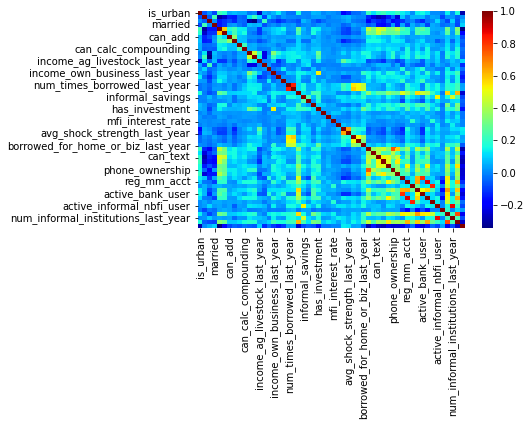

In [ ]:
sns.heatmap(pob1.corr(), cmap='jet')

###Feature Engineering

Creamos variables nuevas a partir de las existentes

In [ ]:
def grupo_edad(pob1):
    años_edad= [
    (pob1['age']<30 ), 
    (pob1['age']>=30) & (pob1['age']<45), 
    (pob1['age']>=45) & (pob1['age']<=60), 
    (pob1['age']>=60)]
    
    etiqueta_edad = ['bajo 30', 'entre 30 y 44', 'entre 45 y 60', 'sobre 60']
    
    pob1['grupo_edad'] = np.select(años_edad, etiqueta_edad)

    
grupo_edad(pob1)


In [ ]:
pob1['cat_pobre'] = [1 if poverty_probability>=0.6
                else 0 for poverty_probability in pob1['poverty_probability']]

In [ ]:
def contador_unico(pob1, cols):
    
    for col in cols:
        print(pob1[col].value_counts())

        
categorias_col=['grupo_edad','country', 'is_urban', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literacy', 'can_add',
       'can_divide', 'can_calc_percents', 'can_calc_compounding',
       'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'share_hh_income_provided',
       'income_ag_livestock_last_year', 'income_friends_family_last_year',
       'income_government_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'borrowing_recency', 'formal_savings',
       'informal_savings', 'cash_property_savings', 'has_insurance',
       'has_investment', 'bank_interest_rate', 'mm_interest_rate',
       'mfi_interest_rate', 'other_fsp_interest_rate', 'num_shocks_last_year',
       'avg_shock_strength_last_year', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'phone_technology', 'can_call',
       'can_text', 'can_use_internet', 'can_make_transaction',
       'phone_ownership', 'advanced_phone_use', 'reg_bank_acct', 'reg_mm_acct',
       'reg_formal_nbfi_account', 'financially_included', 'active_bank_user',
       'active_mm_user', 'active_formal_nbfi_user',
       'active_informal_nbfi_user', 'nonreg_active_mm_user',
       'num_formal_institutions_last_year',
       'num_informal_institutions_last_year',
       'num_financial_activities_last_year', 'poverty_probability']
    
contador_unico(pob1,categorias_col)

bajo 30          4952
entre 30 y 44    4235
entre 45 y 60    2391
sobre 60         1020
Name: grupo_edad, dtype: int64
J    1843
D    1829
I    1810
G    1805
A    1773
C    1769
F    1769
Name: country, dtype: int64
0    8458
1    4140
Name: is_urban, dtype: int64
1    7027
0    5571
Name: female, dtype: int64
1    8170
0    4428
Name: married, dtype: int64
Q    5467
X    5297
P    1694
O      85
N      55
Name: religion, dtype: int64
Head              5228
Spouse            4161
Son/Daughter      2177
Father/Mother      415
Other              321
Sister/Brother     278
Unknown             18
Name: relationship_to_hh_head, dtype: int64
1    4786
2    4082
0    2544
3    1186
Name: education_level, dtype: int64
1    7735
0    4863
Name: literacy, dtype: int64
1    11466
0     1132
Name: can_add, dtype: int64
1    10367
0     2231
Name: can_divide, dtype: int64
0    7658
1    4940
Name: can_calc_percents, dtype: int64
0    7021
1    5577
Name: can_calc_compounding, dtype: int64
1    742

In [ ]:
pob1

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,grupo_edad,cat_pobre
row_id,,,,,,,,,,,,,,,,,,,,,
0,C,0,18,1,1,P,Other,1,1,1,...,0,0,0,0,1,0,1,0.515,bajo 30,0
1,C,1,30,1,1,P,Other,1,1,1,...,0,0,0,0,1,0,0,0.981,entre 30 y 44,1
2,A,0,20,1,1,Q,Spouse,1,1,1,...,0,0,0,0,0,0,0,0.982,bajo 30,1
3,A,0,61,0,1,Q,Head,0,0,1,...,0,0,0,0,0,0,0,0.879,sobre 60,1
4,D,0,26,1,1,X,Spouse,1,1,0,...,0,0,0,0,1,0,3,0.796,bajo 30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,C,1,50,0,1,P,Head,1,1,1,...,0,0,0,0,2,0,1,0.990,entre 45 y 60,1
12596,D,0,90,0,0,O,Head,0,1,1,...,0,0,0,0,0,0,0,0.950,sobre 60,1
12597,J,0,52,1,0,X,Head,1,0,1,...,0,0,1,0,0,1,0,0.342,entre 45 y 60,0


# Analisis Exploratorio de Datos (EDA)

###Analisis Univariable

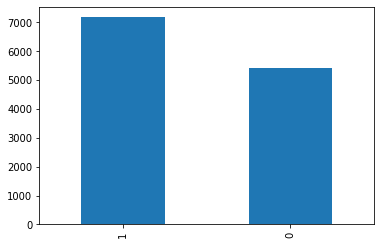

In [ ]:
pob1['cat_pobre'].value_counts().plot(kind='bar')

Es notable que es mayor el numero de personas con alta probabilidad de estar en condiciones de pobreza, alrededor de un 25% mas, en comparacion con las que no.

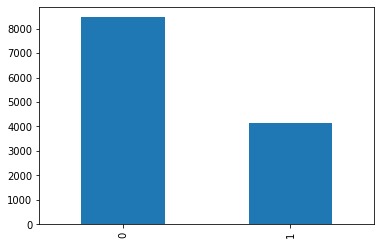

In [ ]:
pob1['is_urban'].value_counts().plot(kind='bar')

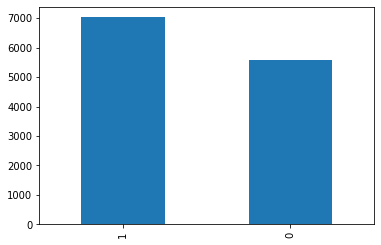

In [ ]:
pob1['female'].value_counts().plot(kind='bar')

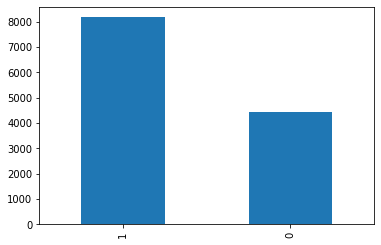

In [ ]:
pob1['married'].value_counts().plot(kind='bar')

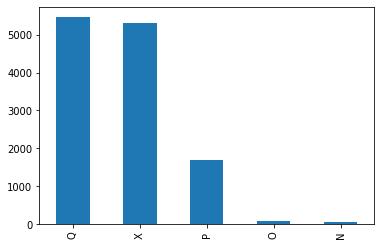

In [ ]:
pob1['religion'].value_counts().plot(kind='bar')

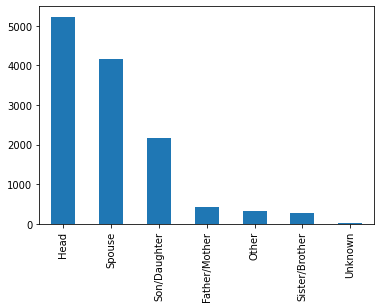

In [ ]:
pob1['relationship_to_hh_head'].value_counts().plot(kind='bar')

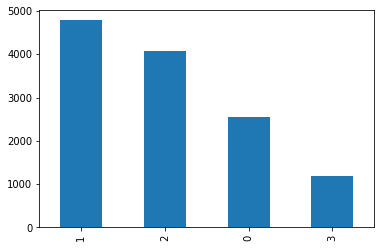

In [ ]:
pob1['education_level'].value_counts().plot(kind='bar')

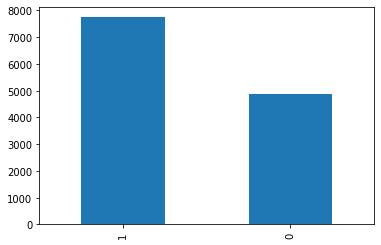

In [ ]:
pob1['literacy'].value_counts().plot(kind='bar')

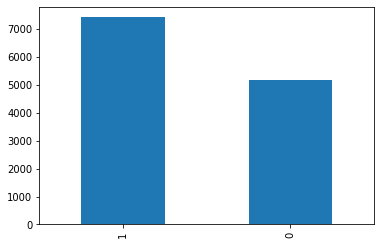

In [ ]:
pob1['employed_last_year'].value_counts().plot(kind='bar')

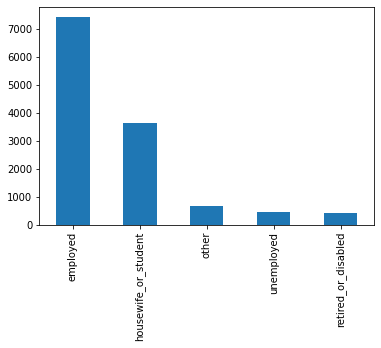

In [ ]:
pob1['employment_category_last_year'].value_counts().plot(kind='bar')

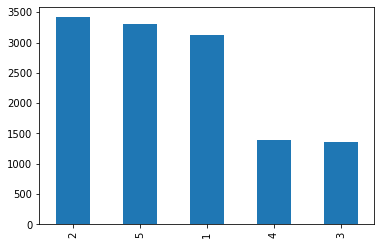

In [ ]:
pob1['share_hh_income_provided'].value_counts().plot(kind='bar')

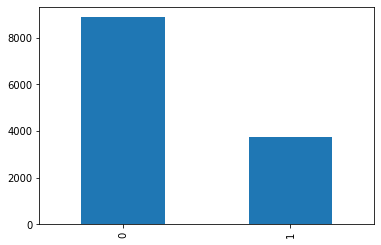

In [ ]:
pob1['formal_savings'].value_counts().plot(kind='bar')

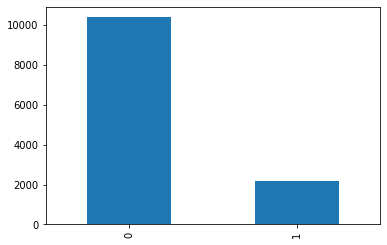

In [ ]:
pob1['informal_savings'].value_counts().plot(kind='bar')

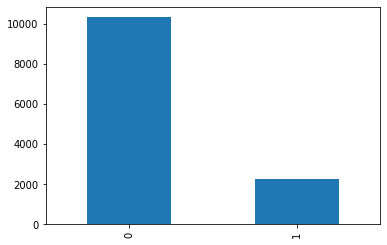

In [ ]:
pob1['borrowed_for_daily_expenses_last_year'].value_counts().plot(kind='bar')

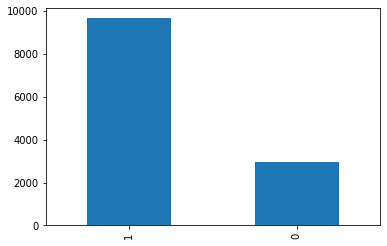

In [ ]:
pob1['can_call'].value_counts().plot(kind='bar')

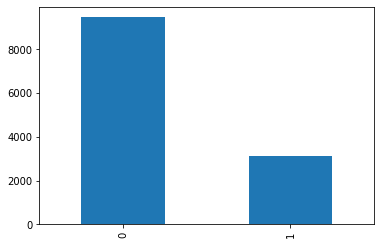

In [ ]:
pob1['can_use_internet'].value_counts().plot(kind='bar')

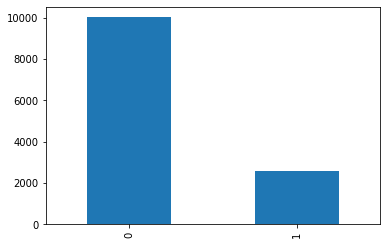

In [ ]:
pob1['active_bank_user'].value_counts().plot(kind='bar')

###Analisis Bivariable

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


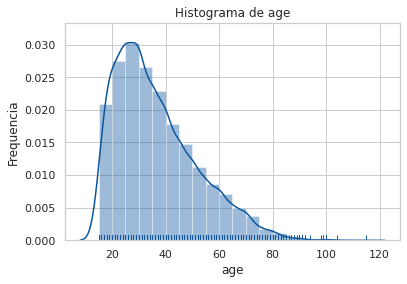

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


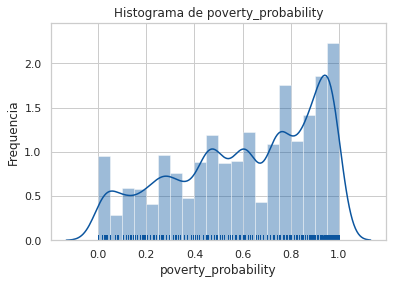

In [ ]:
num_cols = ['age','poverty_probability'] 
def plot_density_hist(pob1, cols, bins = 10, hist = False):
    for col in cols:
        sns.set(style="whitegrid", palette='Blues_r')
        sns.distplot(pob1[col], bins = bins, rug=True, hist = hist)
        plt.title('Histograma de ' + col) 
        plt.xlabel(col) 
        plt.ylabel('Frequencia')
        plt.show()
        
plot_density_hist(pob1, num_cols, bins = 20, hist = True)

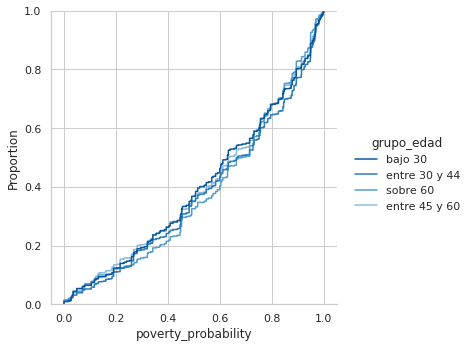

In [ ]:
sns.displot(pob1, x="poverty_probability", hue="grupo_edad", kind="ecdf", color= 'r')

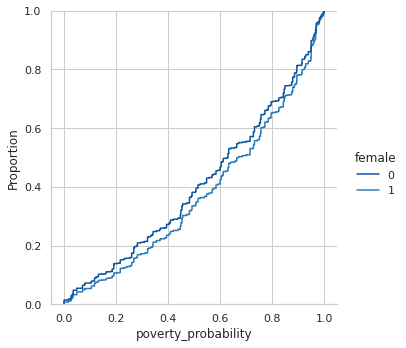

In [ ]:
sns.displot(pob1, x="poverty_probability", hue="female", kind="ecdf")

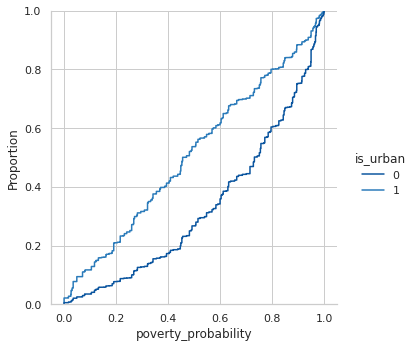

In [ ]:
sns.displot(pob1, x="poverty_probability", hue="is_urban", kind="ecdf")

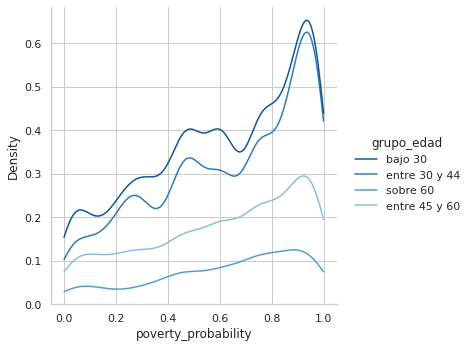

In [ ]:
sns.displot(pob1, x="poverty_probability", kind="kde",hue='grupo_edad', cut=0)

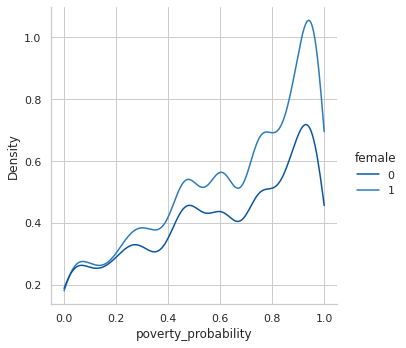

In [ ]:
sns.displot(pob1, x="poverty_probability", kind="kde",hue='female', cut=0)

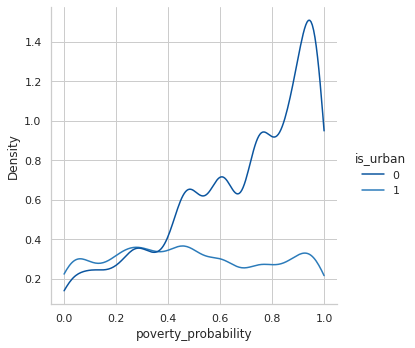

In [ ]:
sns.displot(pob1, x="poverty_probability", kind="kde",hue='is_urban', cut=0)

In [ ]:
pob1._get_numeric_data().head()

,is_urban,age,female,married,education_level,literacy,can_add,can_divide,can_calc_percents,can_calc_compounding,...,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,cat_pobre
row_id,,,,,,,,,,,,,,,,,,,,,
0,0,18,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0.515,0
1,1,30,1,1,1,1,1,1,0,0,...,1,0,0,0,0,1,0,0,0.981,1
2,0,20,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0.982,1
3,0,61,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0.879,1
4,0,26,1,1,1,1,0,1,0,0,...,0,0,0,0,0,1,0,3,0.796,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


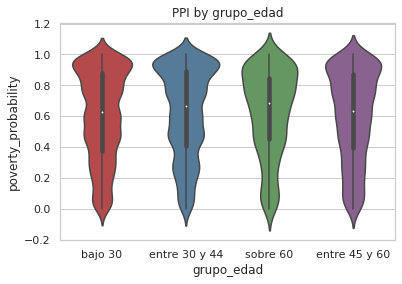

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


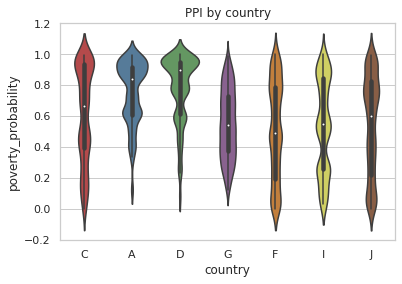

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


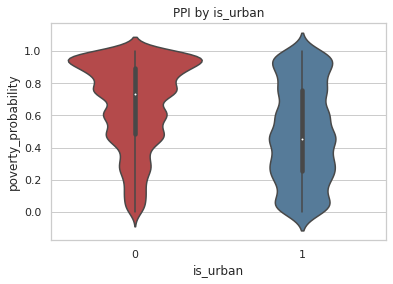

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


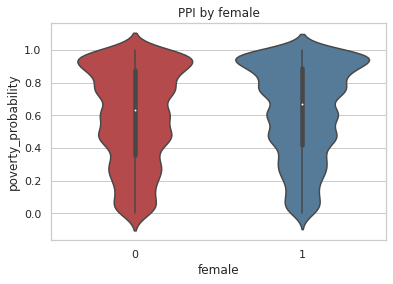

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


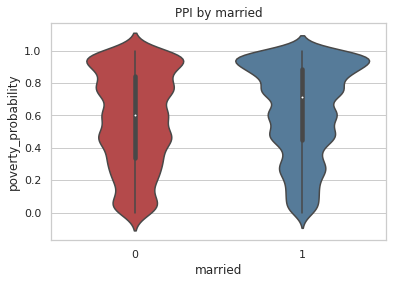

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


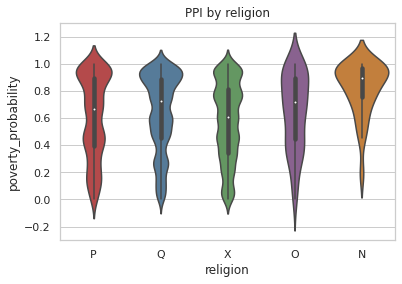

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


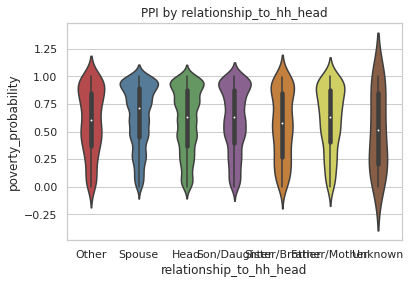

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


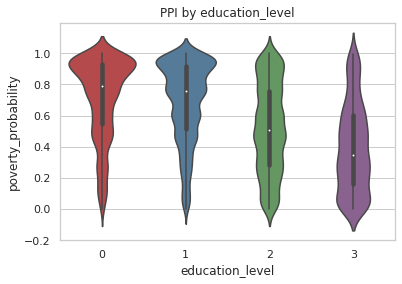

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


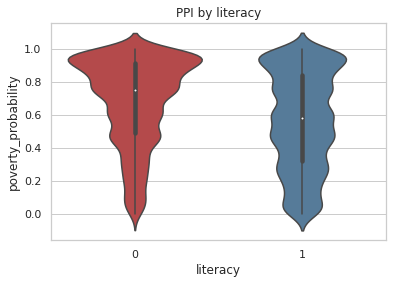

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


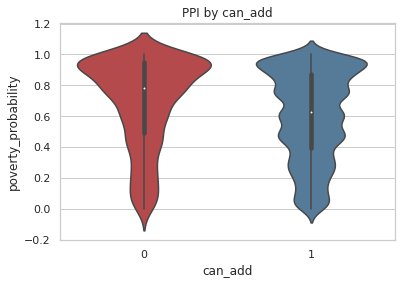

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


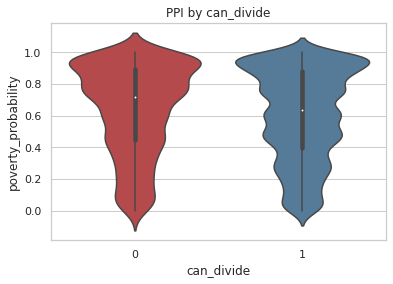

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


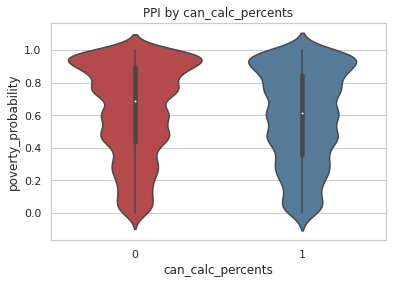

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


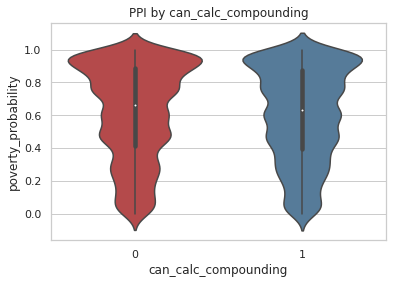

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


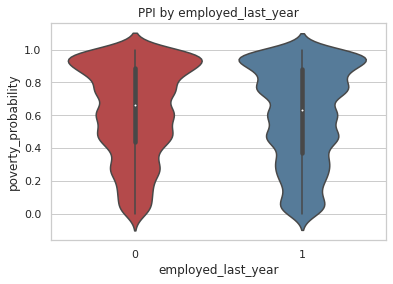

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


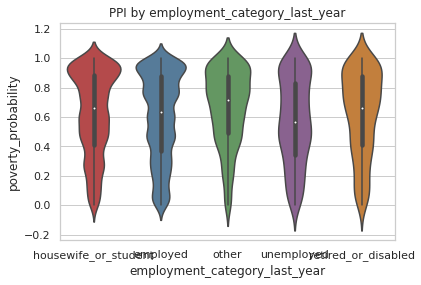

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


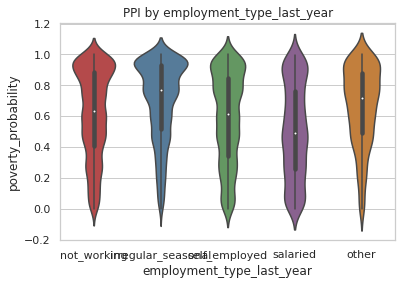

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


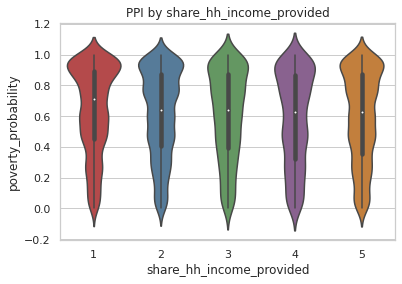

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


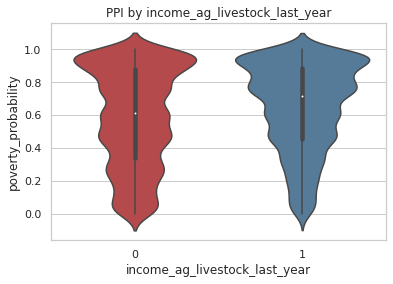

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


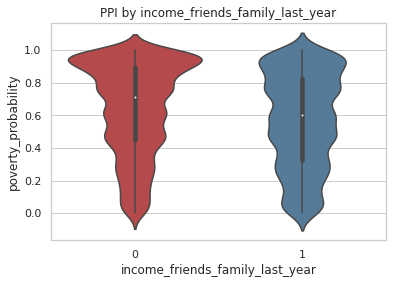

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


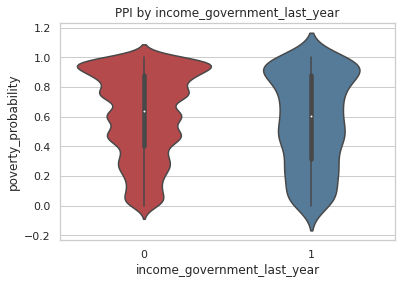

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


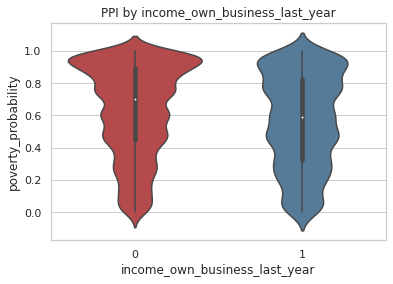

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


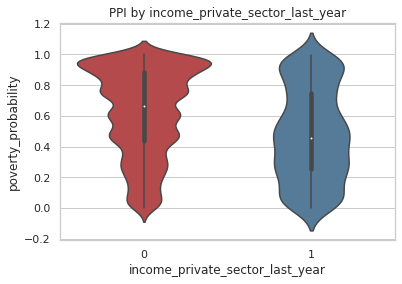

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


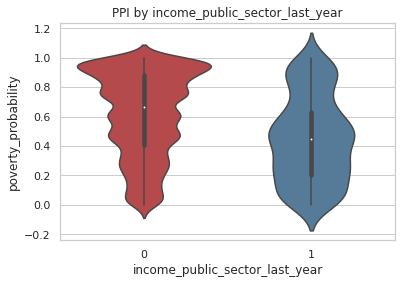

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


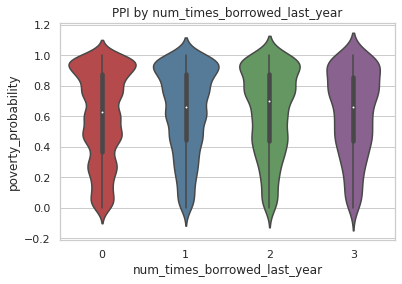

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


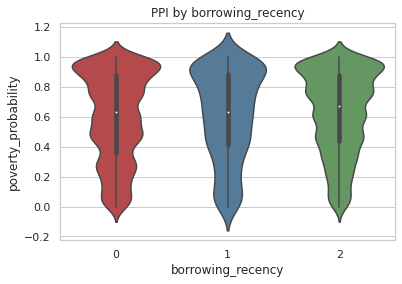

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


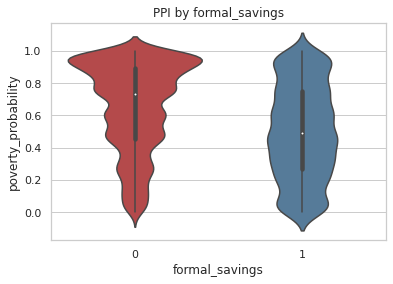

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


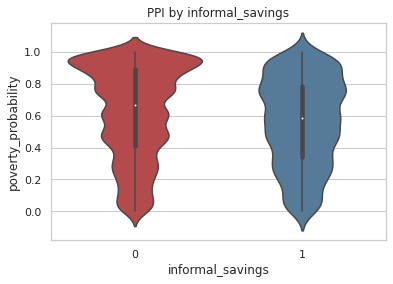

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


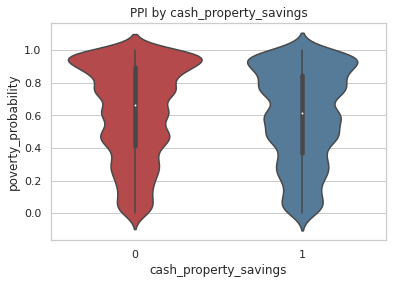

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


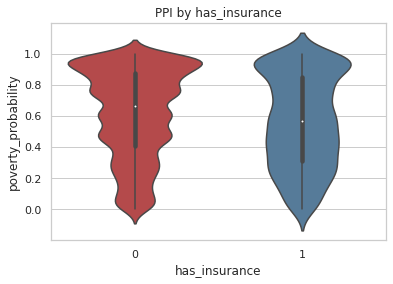

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


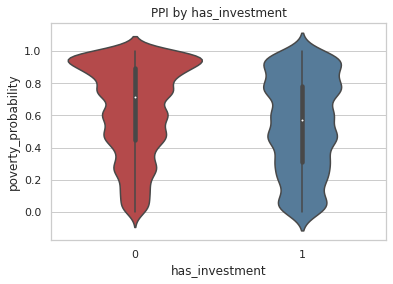

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


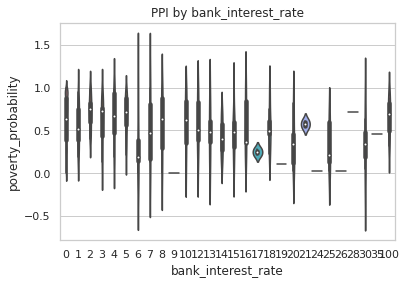

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


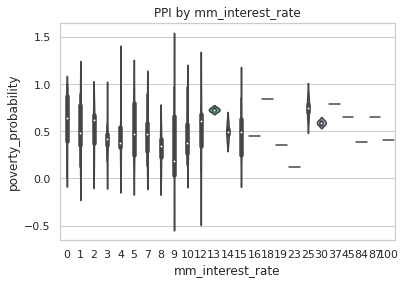

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


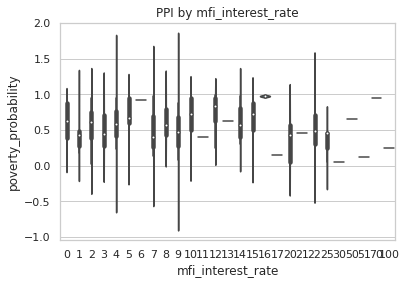

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


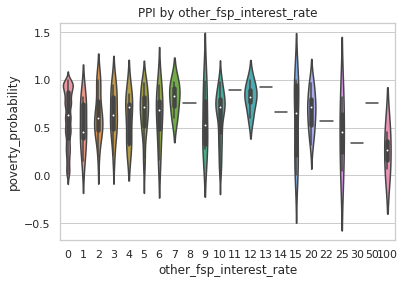

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


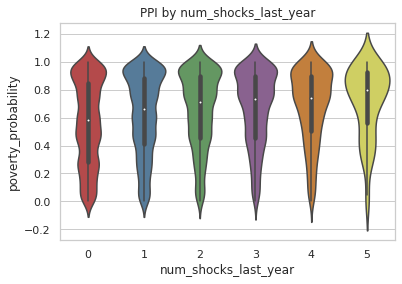

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


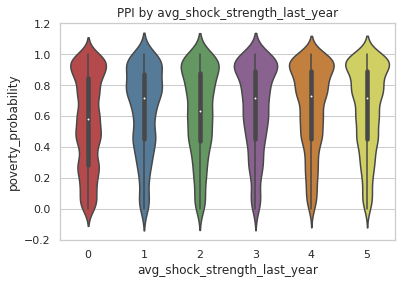

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


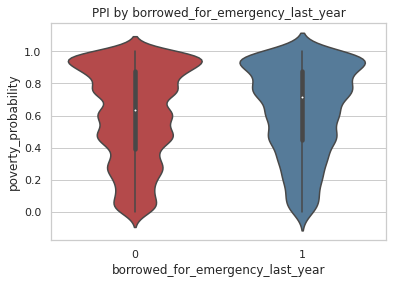

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


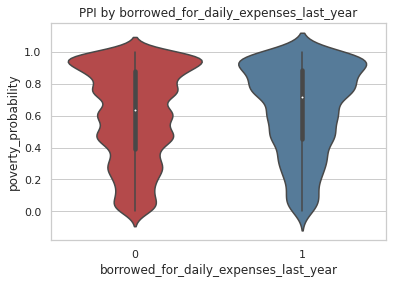

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


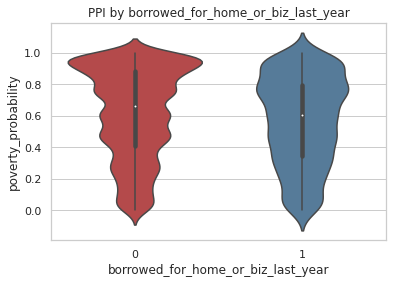

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


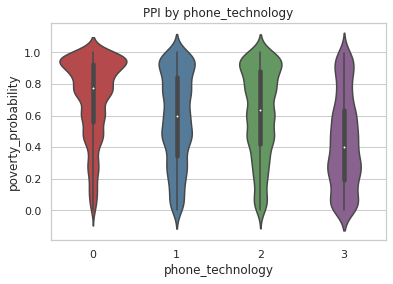

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


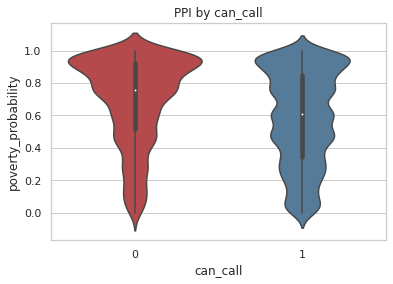

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


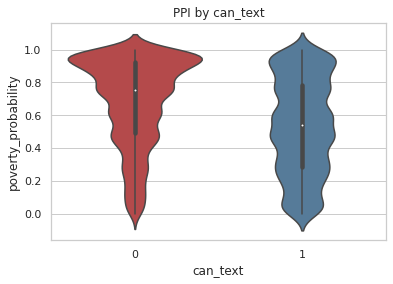

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


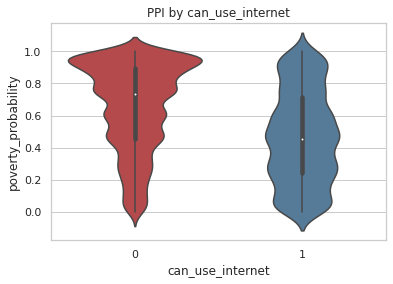

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


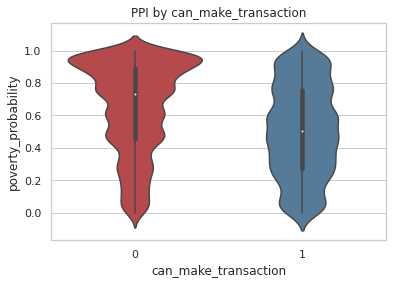

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


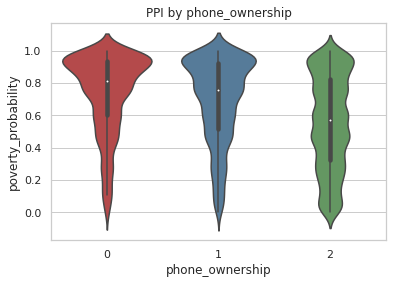

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


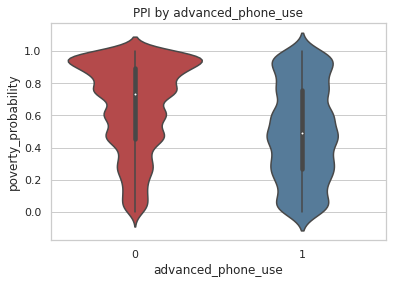

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


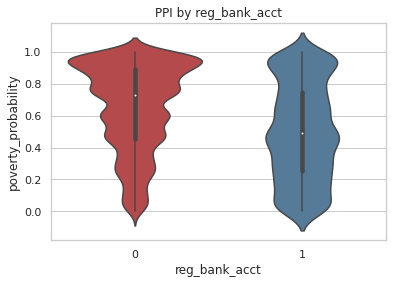

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


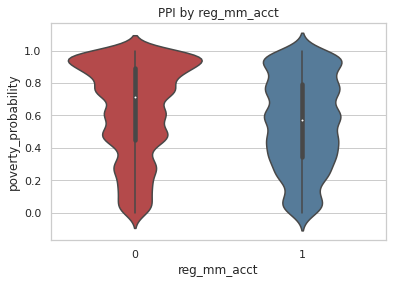

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


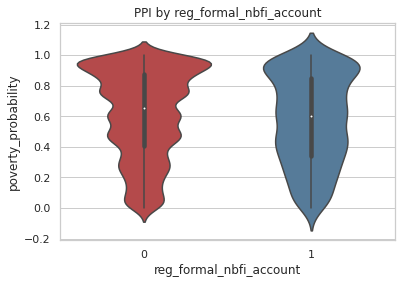

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


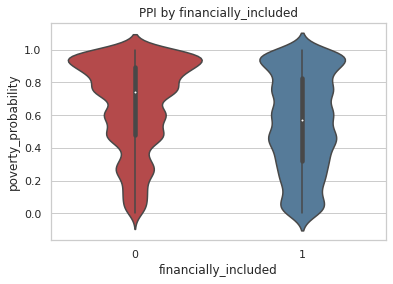

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


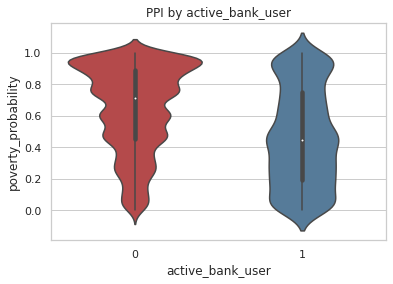

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


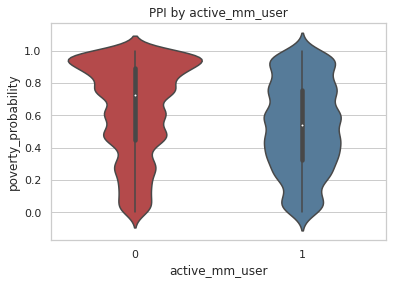

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


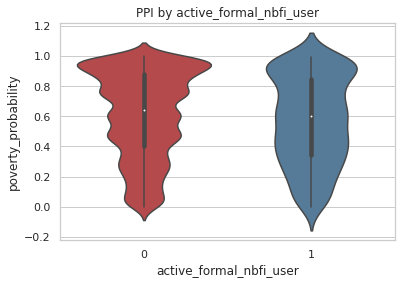

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


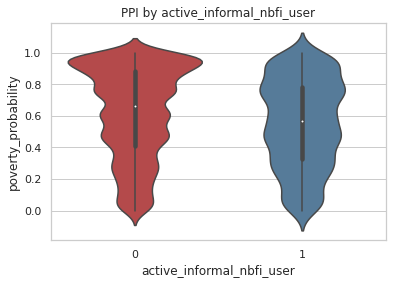

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


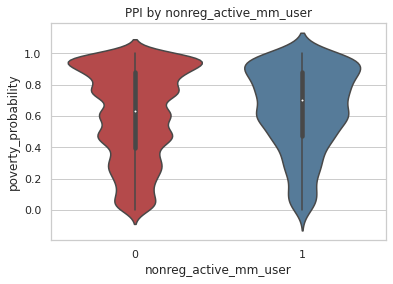

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


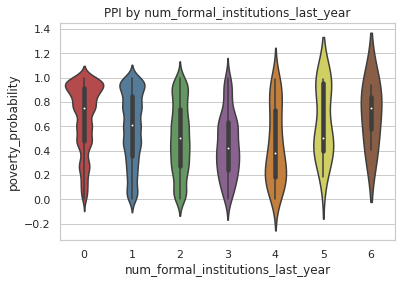

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


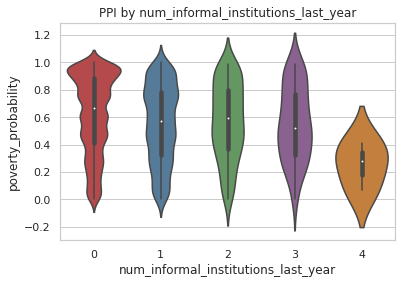

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


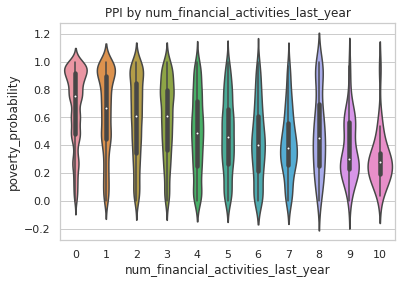

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


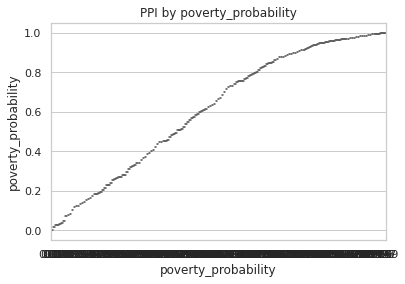

In [ ]:
def plot_violin(pob1, cols, col_y, title):
    for col in cols:
        sns.set(style="whitegrid")
        
        sns.set_palette("Set1", n_colors=7, desat=.7)
        
        sns.violinplot(col, col_y, data=pob1)
        
        plt.xlabel(col) 
        
        plt.ylabel(col_y)
        
        plt.title(title + ' by ' + col)
        
        plt.show()
        
plot_violin(pob1, categorias_col, 'poverty_probability', 'PPI')    

###Analisis Multivariable

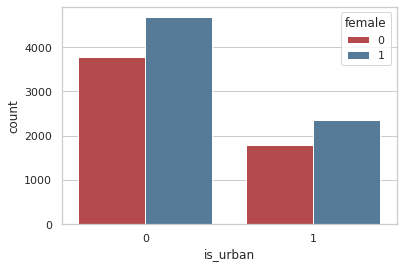

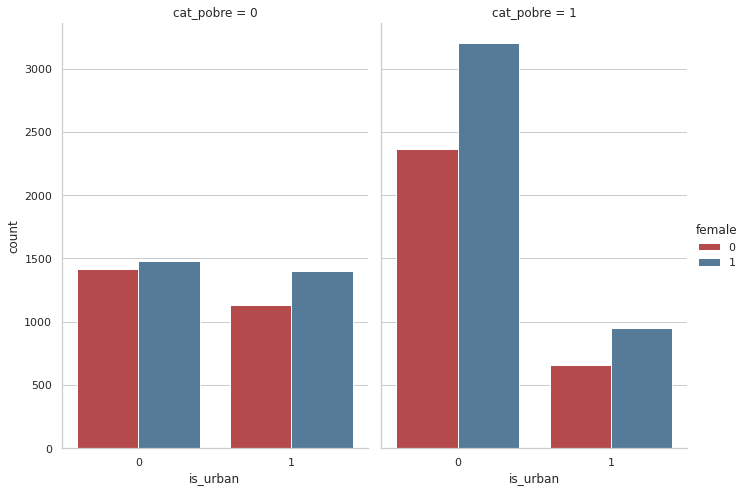

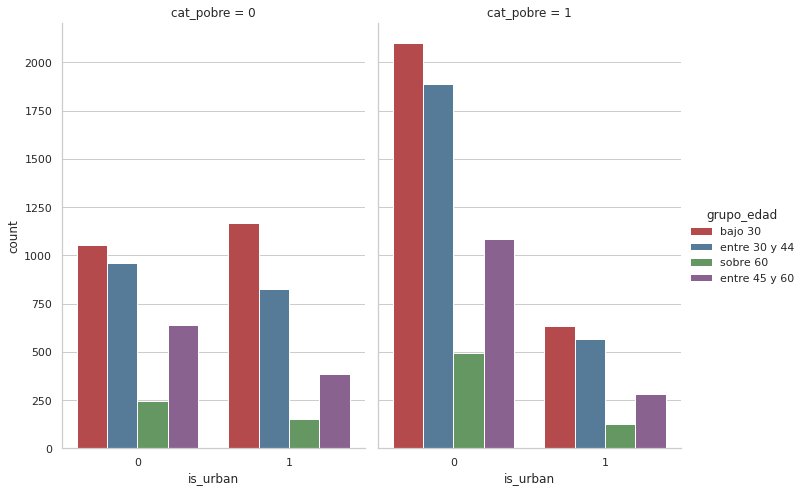

In [ ]:
sns.countplot(x="is_urban", hue="female", data=pob1)
sns.catplot(x="is_urban", hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)
sns.catplot(x="is_urban", hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)

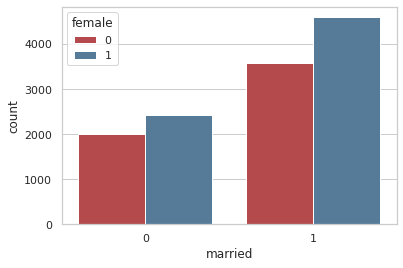

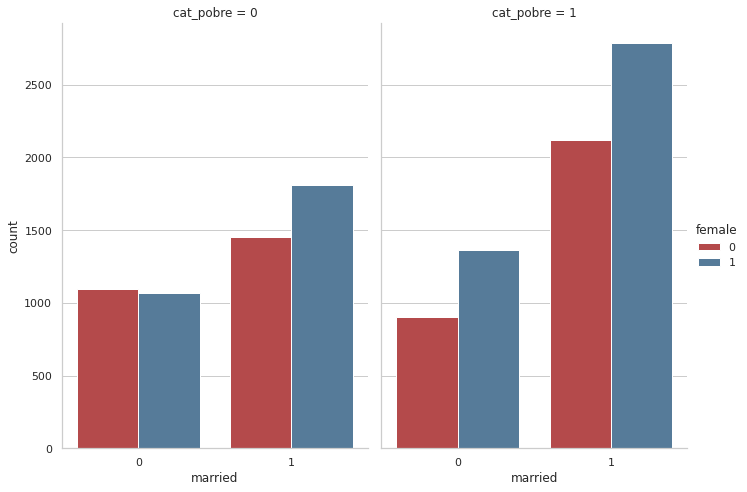

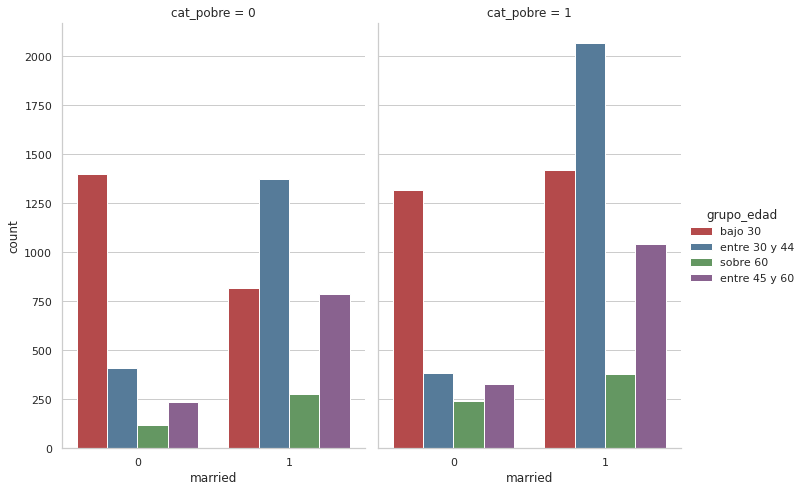

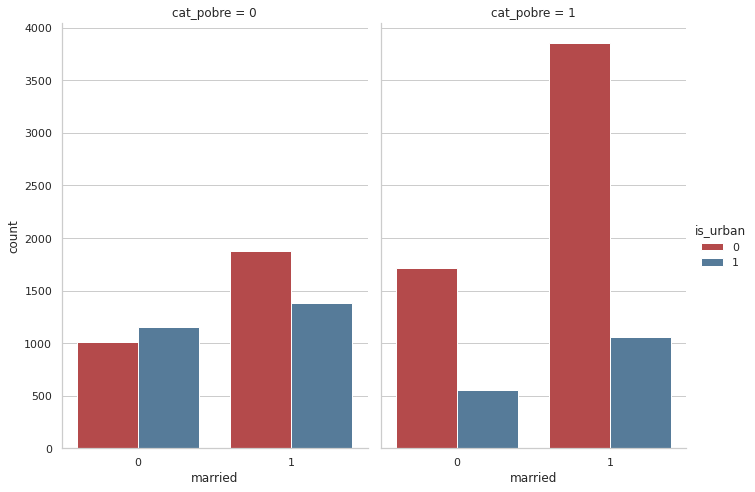

In [ ]:
sns.countplot(x="married", hue="female", data=pob1)
sns.catplot(x="married", hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)
sns.catplot(x="married", hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)
sns.catplot(x="married", hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)

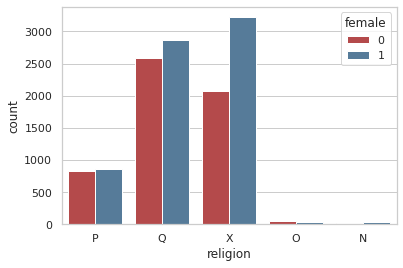

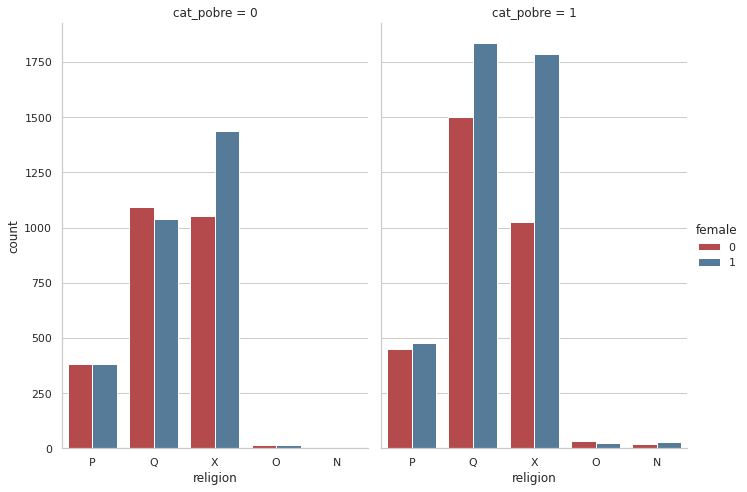

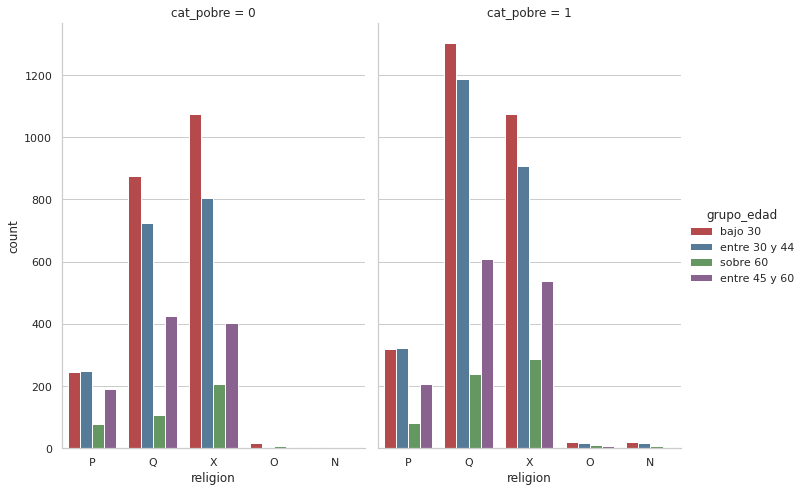

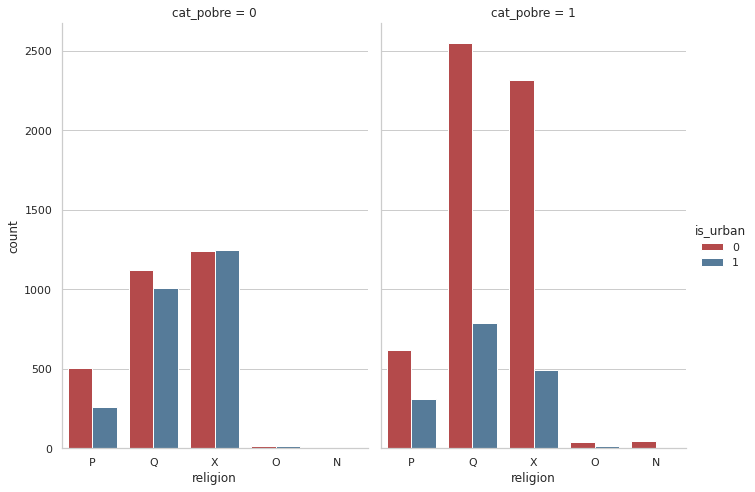

In [ ]:
sns.countplot(x='religion', hue='female', data=pob1)
sns.catplot(x='religion', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)
sns.catplot(x='religion', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)
sns.catplot(x="religion", hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.7)

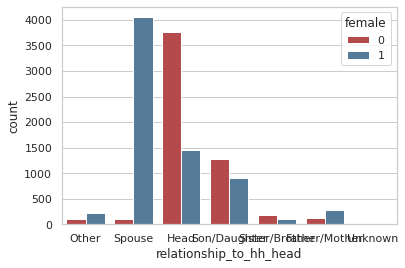

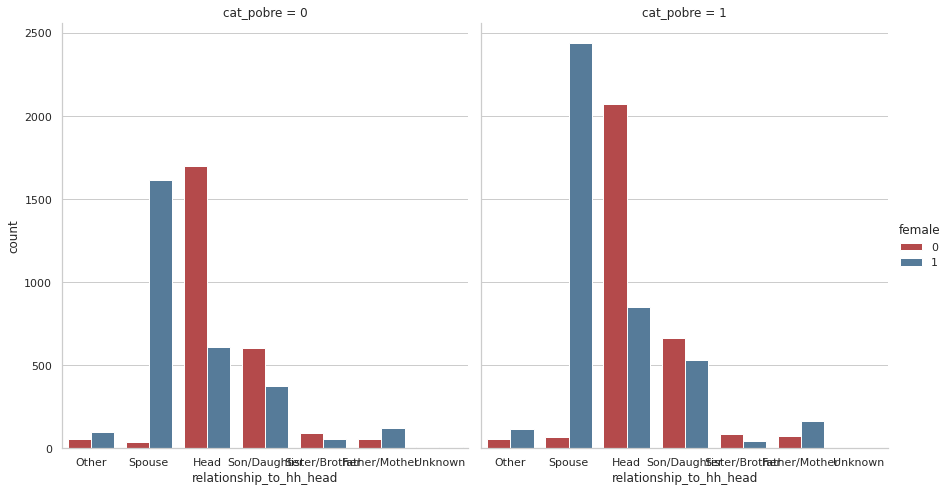

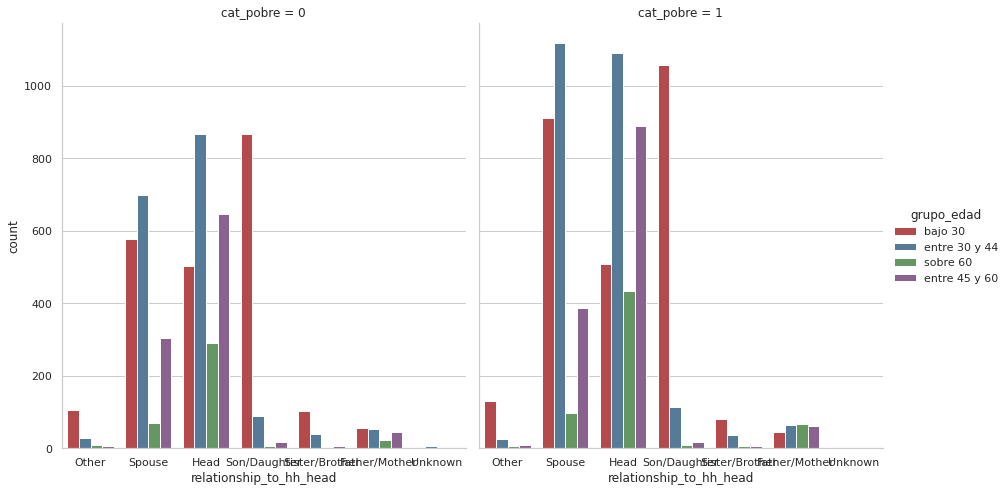

In [ ]:
sns.countplot(x='relationship_to_hh_head', hue='female', data=pob1)
sns.catplot(x='relationship_to_hh_head', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='relationship_to_hh_head', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

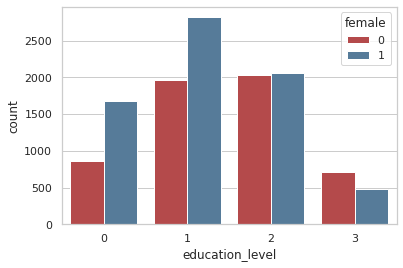

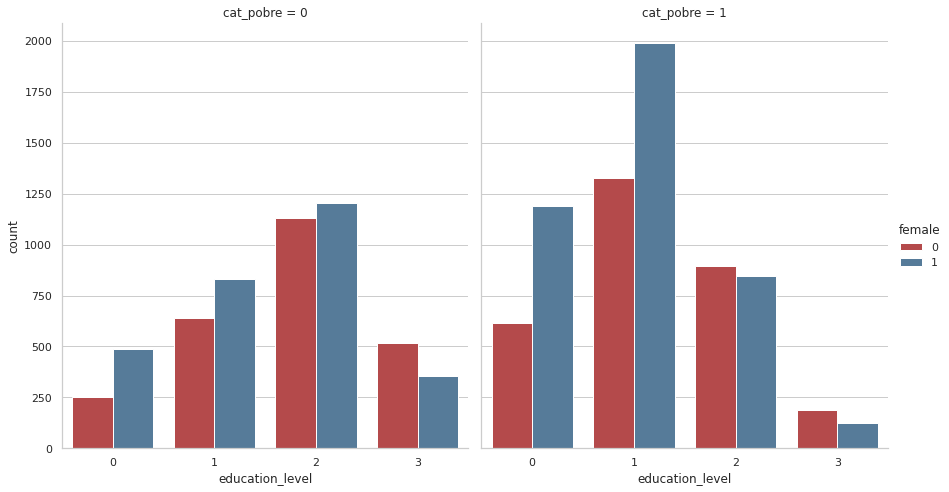

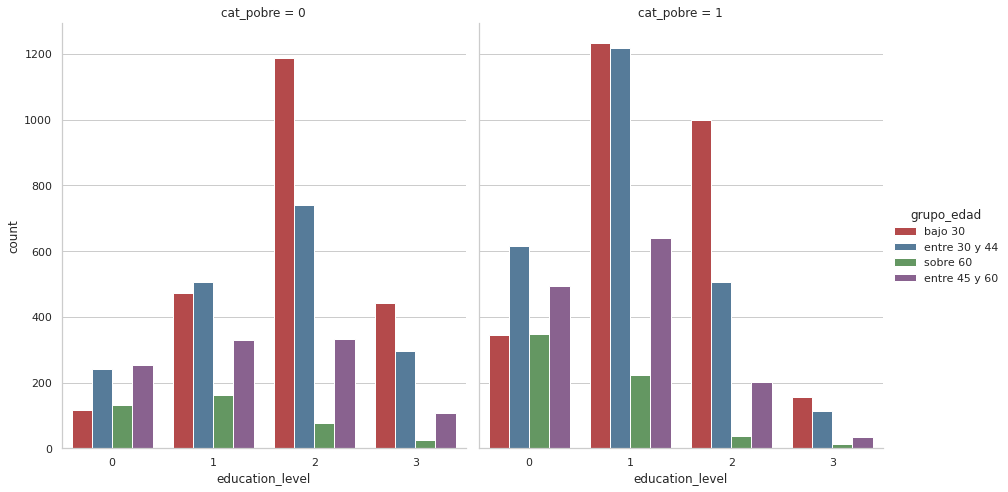

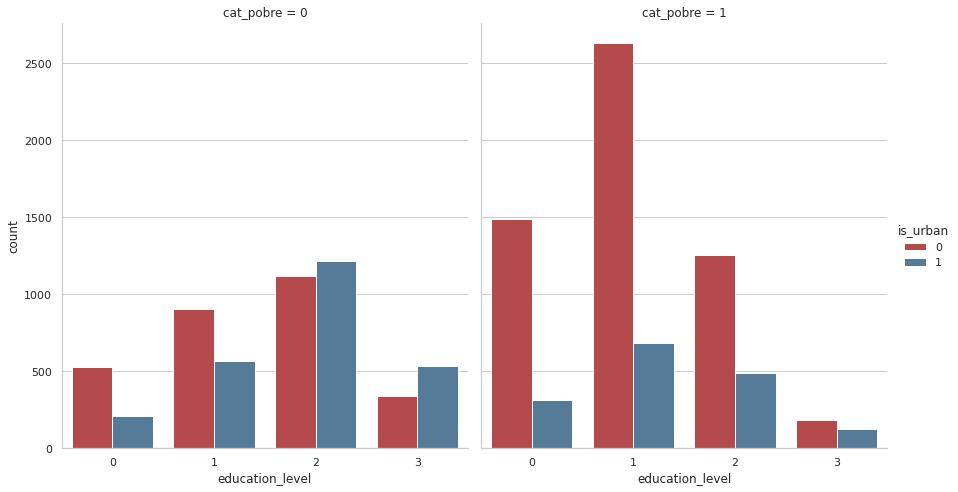

In [ ]:
sns.countplot(x='education_level', hue='female', data=pob1)
sns.catplot(x='education_level', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='education_level', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='education_level', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

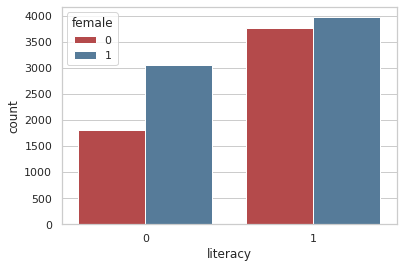

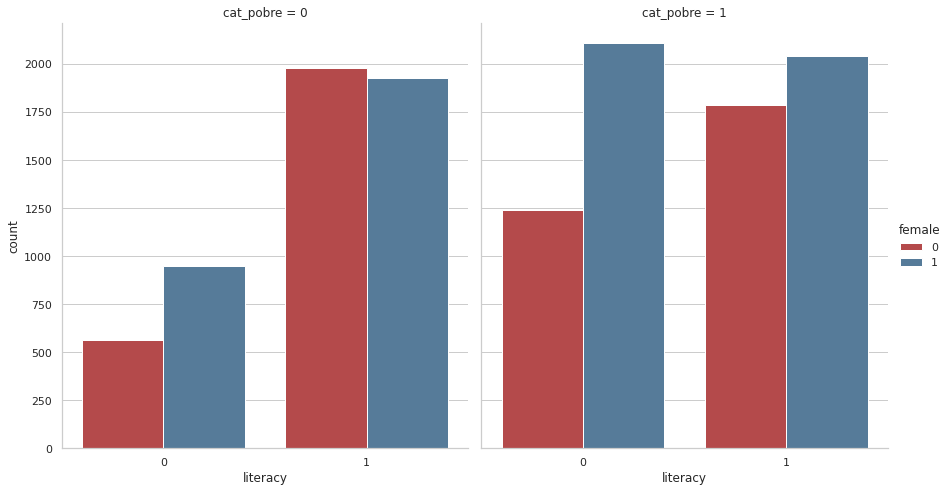

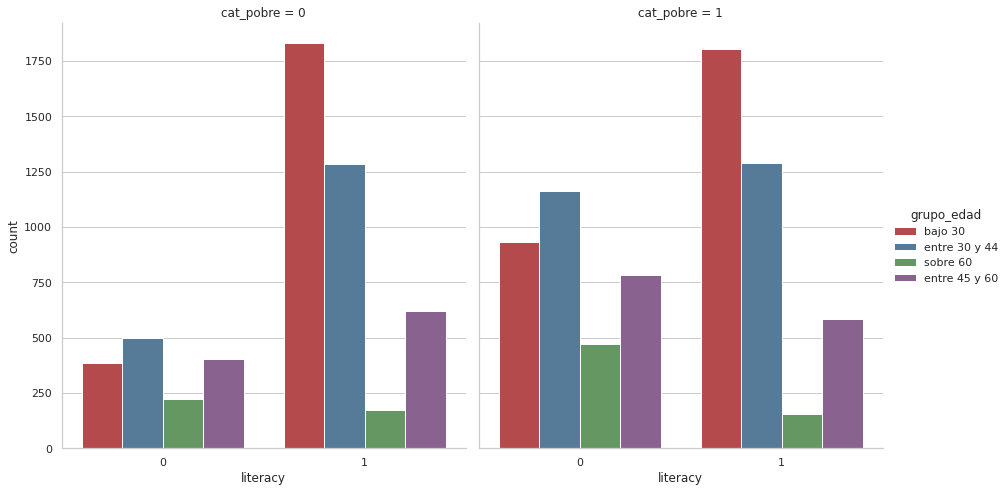

In [ ]:
sns.countplot(x='literacy', hue='female', data=pob1)
sns.catplot(x='literacy', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='literacy', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

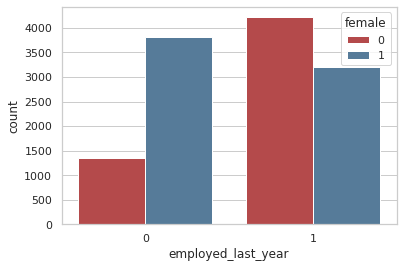

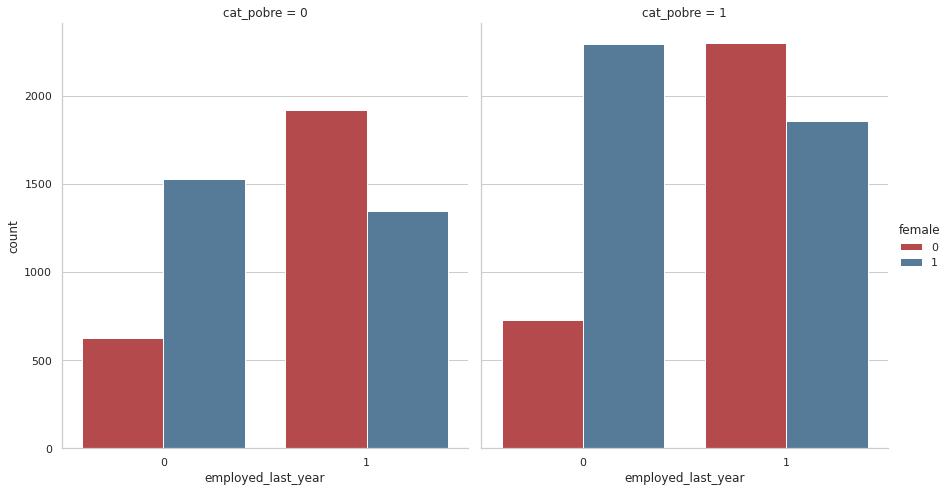

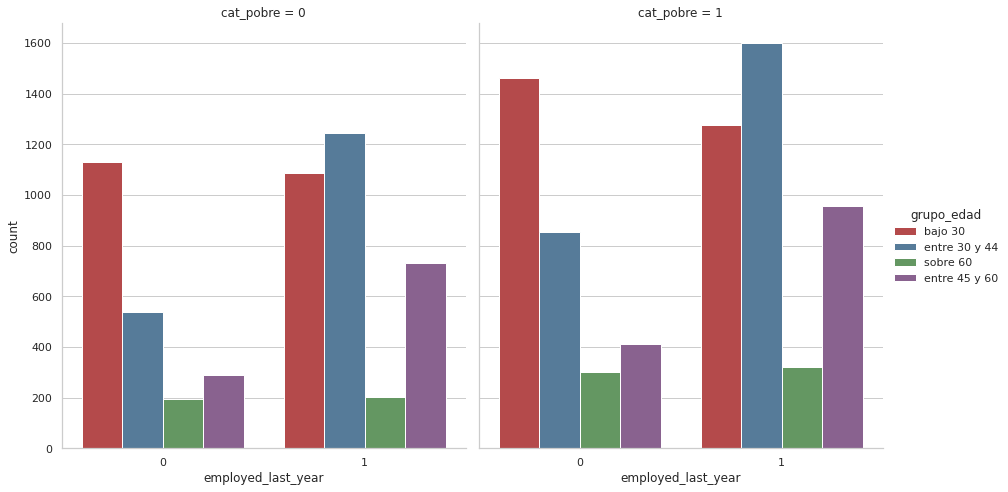

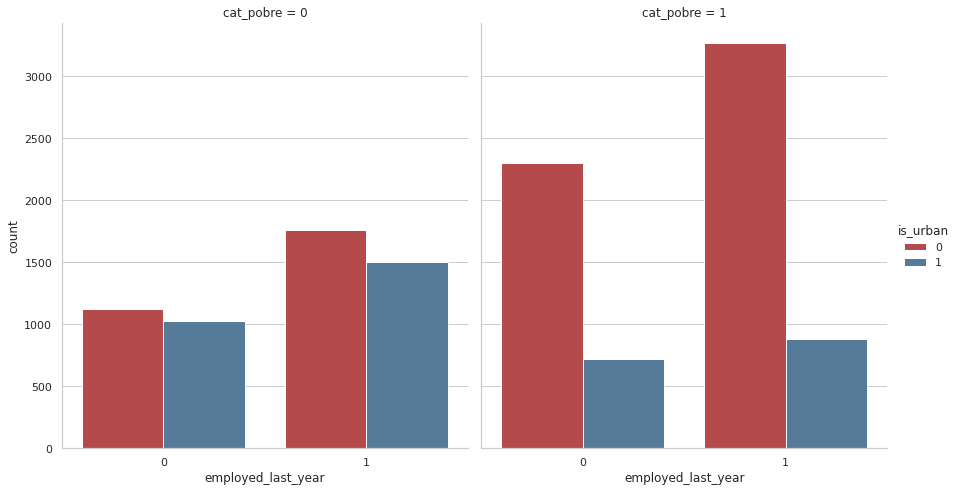

In [ ]:
sns.countplot(x='employed_last_year', hue='female', data=pob1)
sns.catplot(x='employed_last_year', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='employed_last_year', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='employed_last_year', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

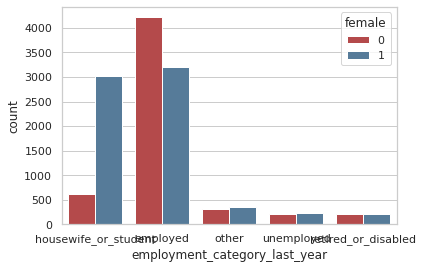

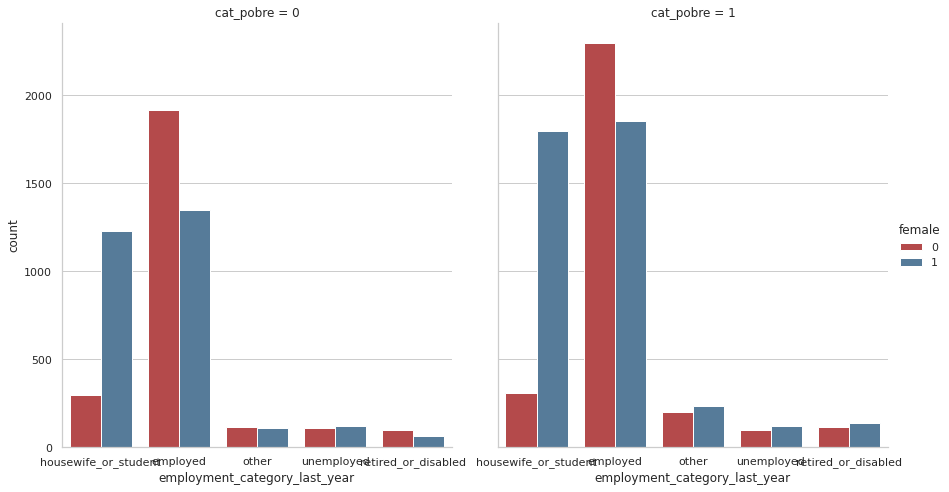

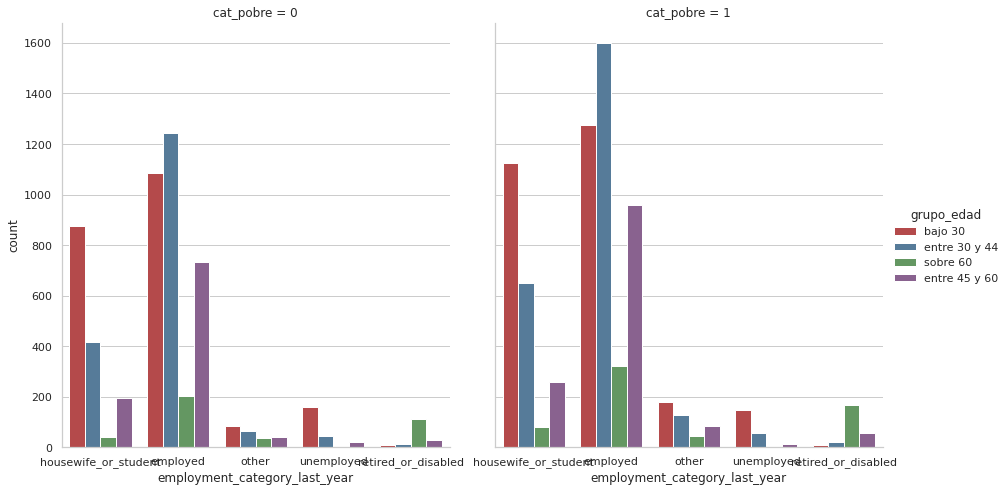

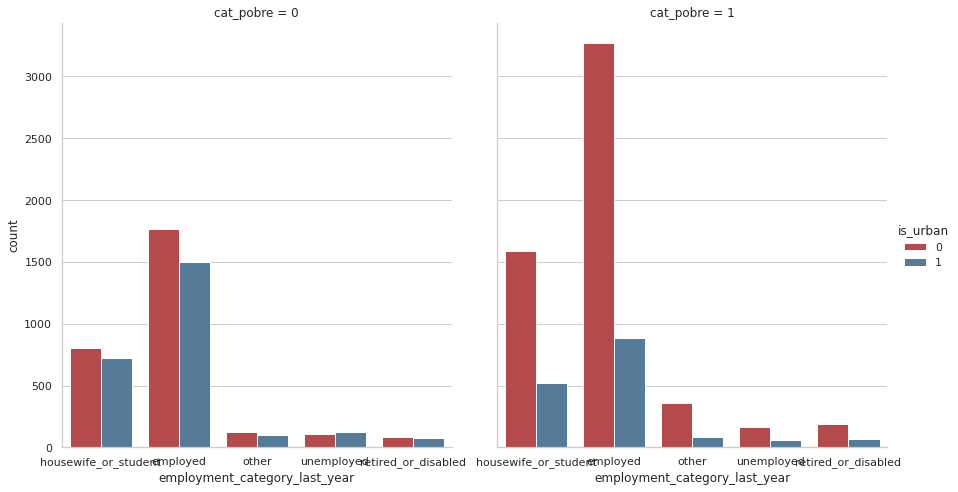

In [ ]:
sns.countplot(x='employment_category_last_year', hue='female', data=pob1)
sns.catplot(x='employment_category_last_year', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='employment_category_last_year', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='employment_category_last_year', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

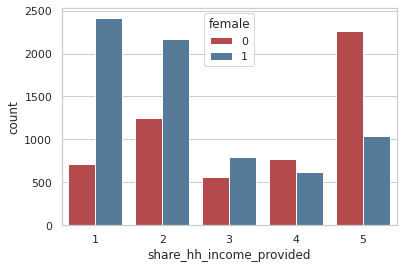

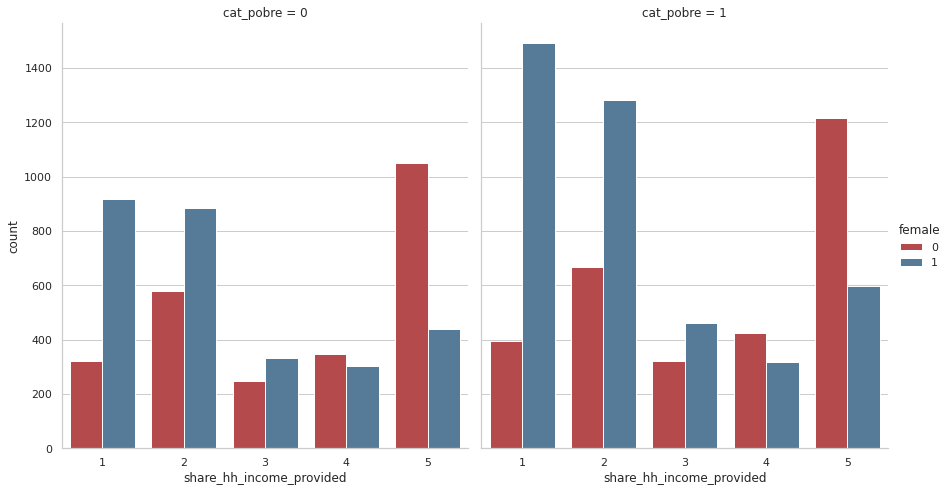

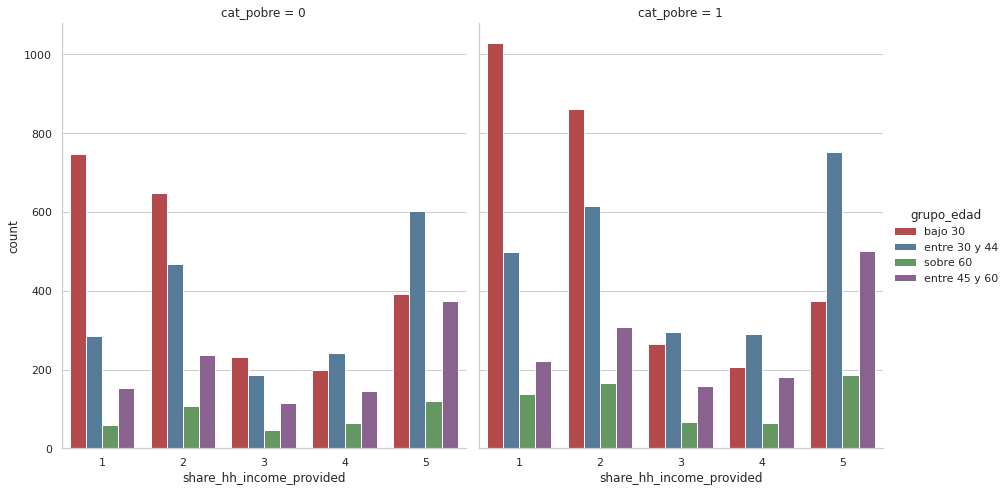

In [ ]:
sns.countplot(x='share_hh_income_provided', hue='female', data=pob1)
sns.catplot(x='share_hh_income_provided', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='share_hh_income_provided', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

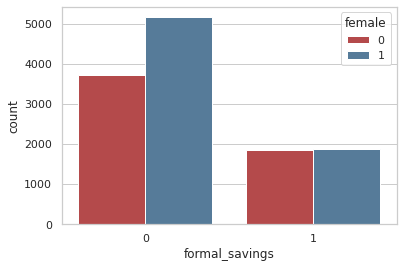

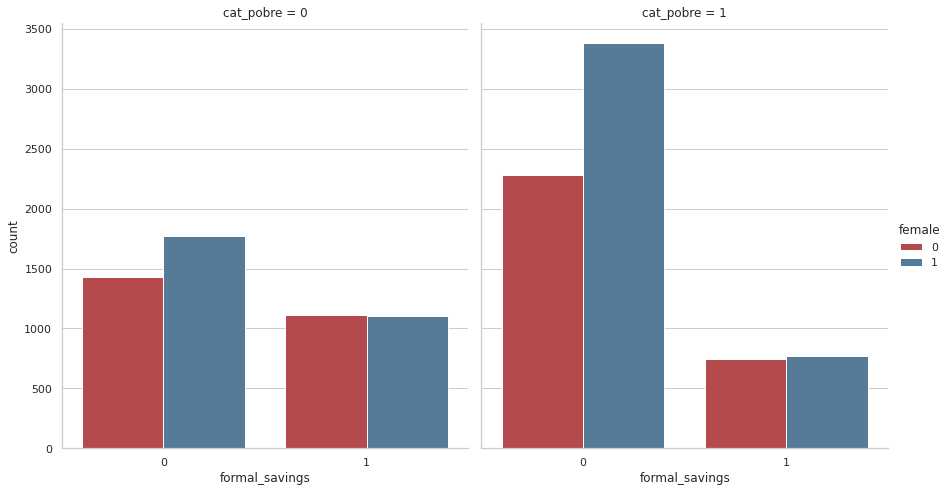

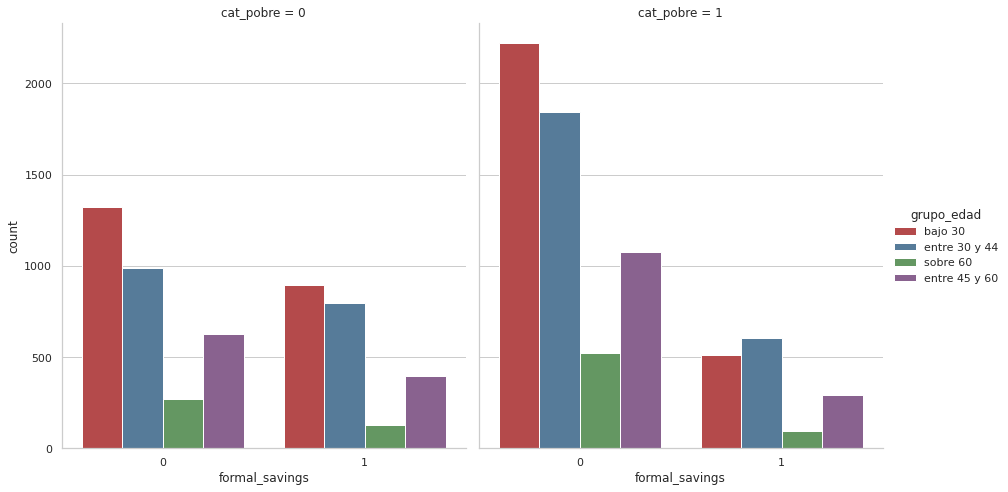

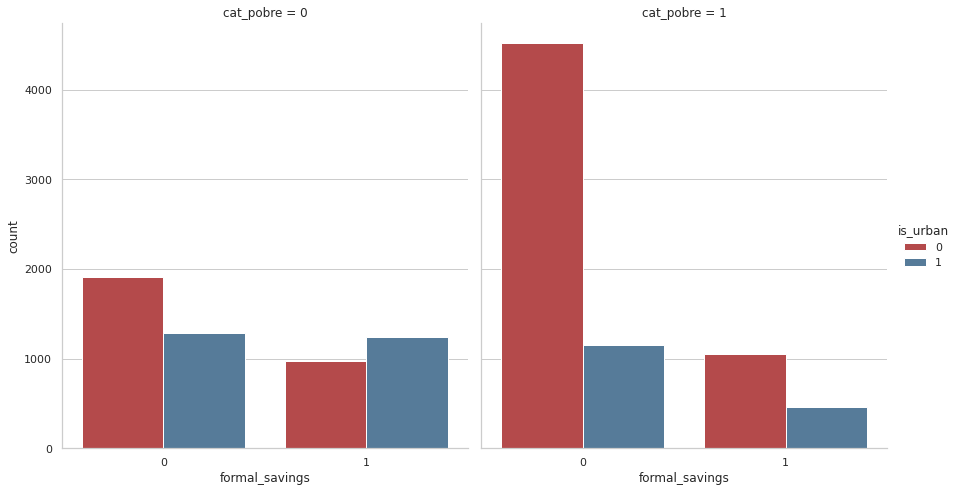

In [ ]:
sns.countplot(x='formal_savings', hue='female', data=pob1)
sns.catplot(x='formal_savings', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='formal_savings', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='formal_savings', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

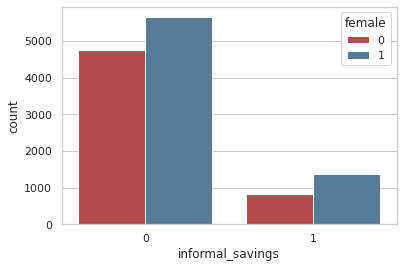

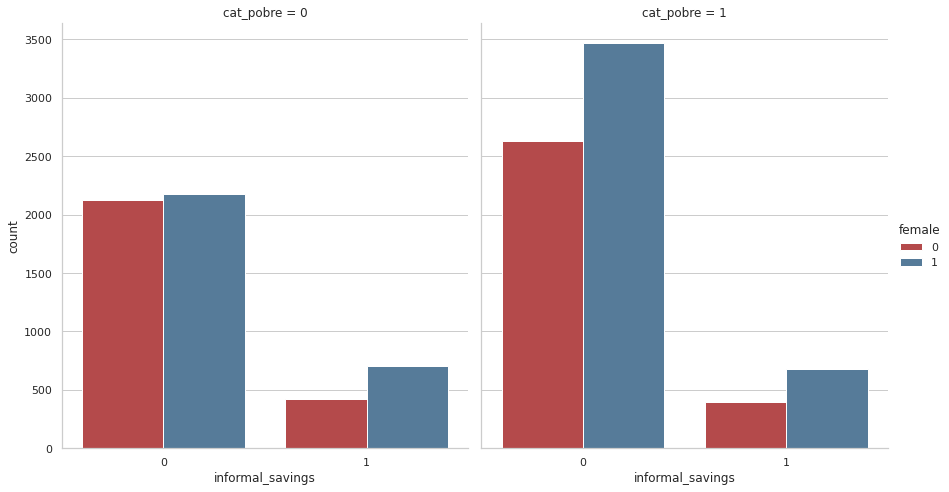

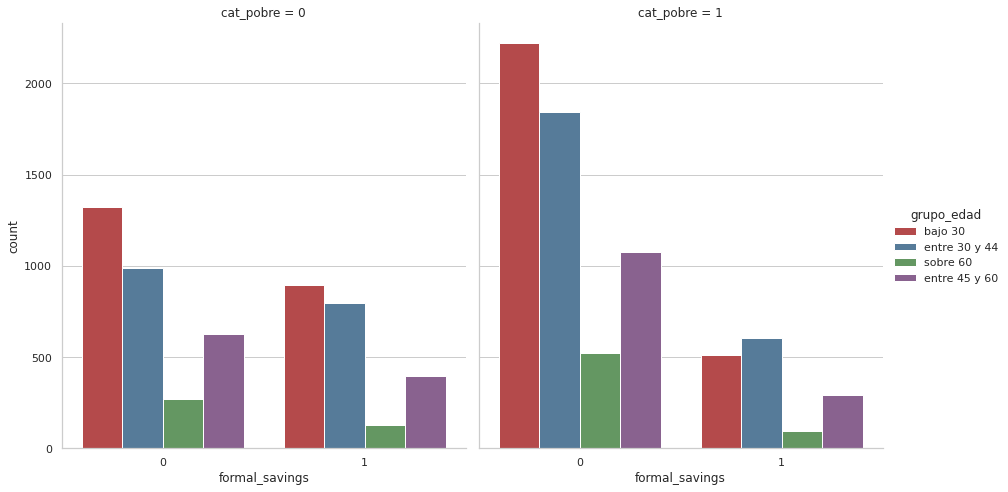

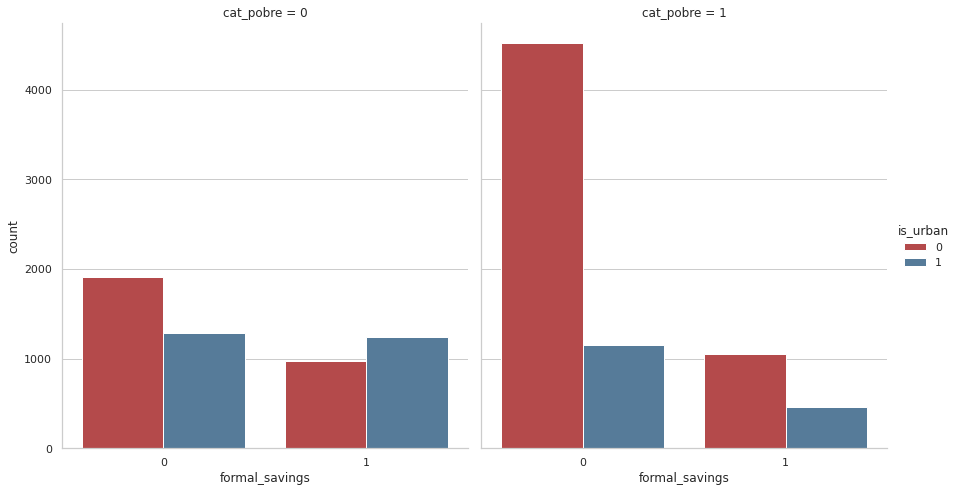

In [ ]:
sns.countplot(x='informal_savings', hue='female', data=pob1)
sns.catplot(x='informal_savings', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='formal_savings', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='formal_savings', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

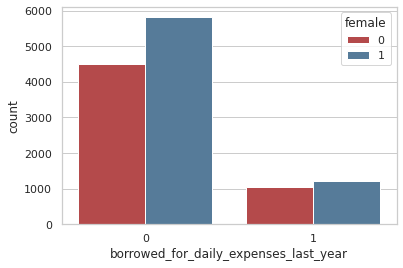

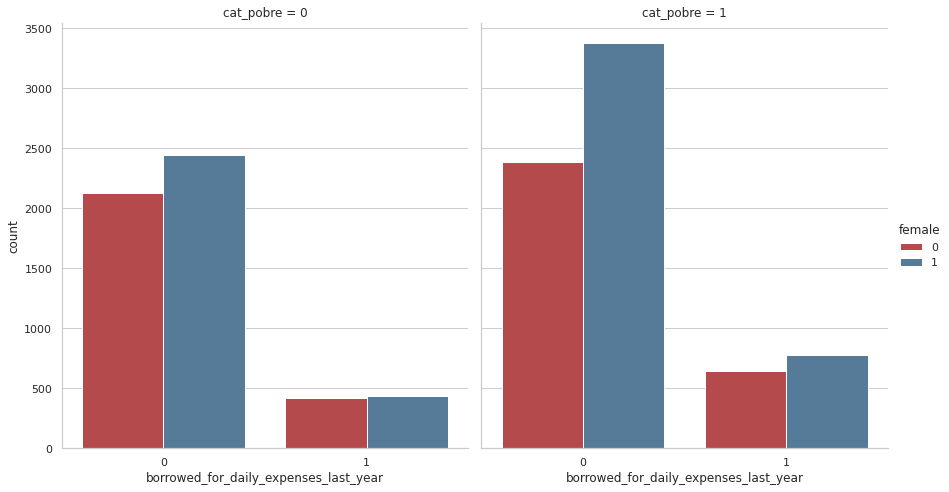

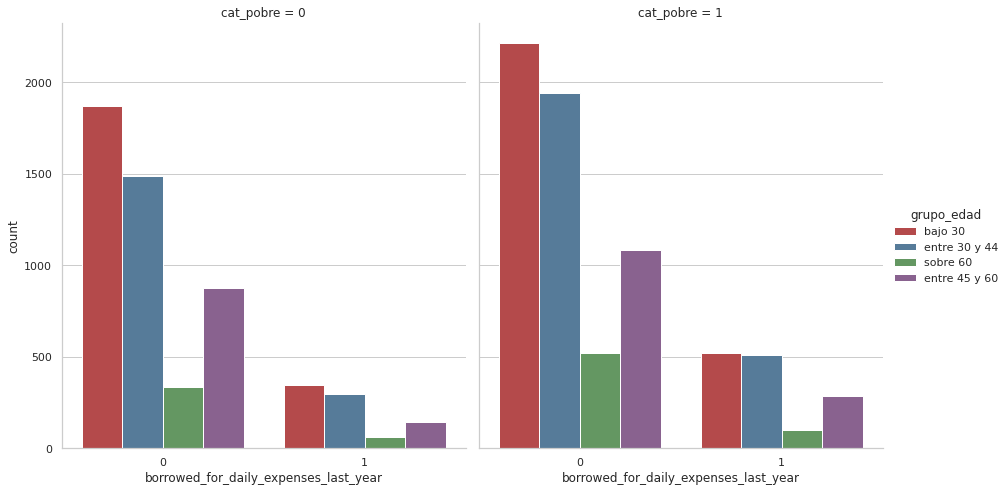

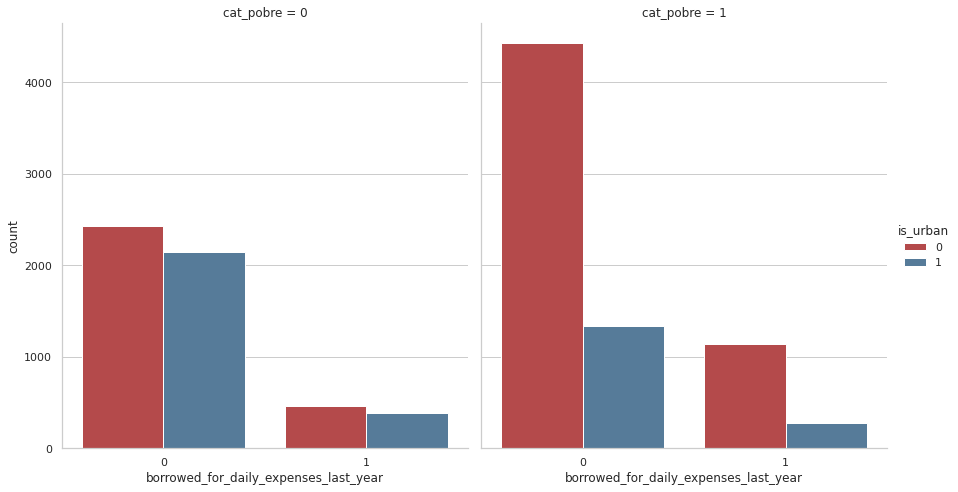

In [ ]:
sns.countplot(x='borrowed_for_daily_expenses_last_year', hue='female', data=pob1)
sns.catplot(x='borrowed_for_daily_expenses_last_year', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='borrowed_for_daily_expenses_last_year', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='borrowed_for_daily_expenses_last_year', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

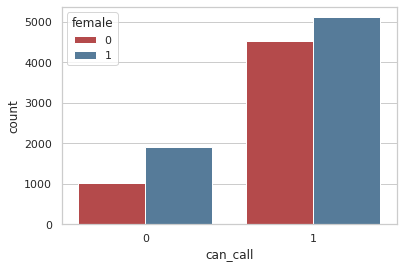

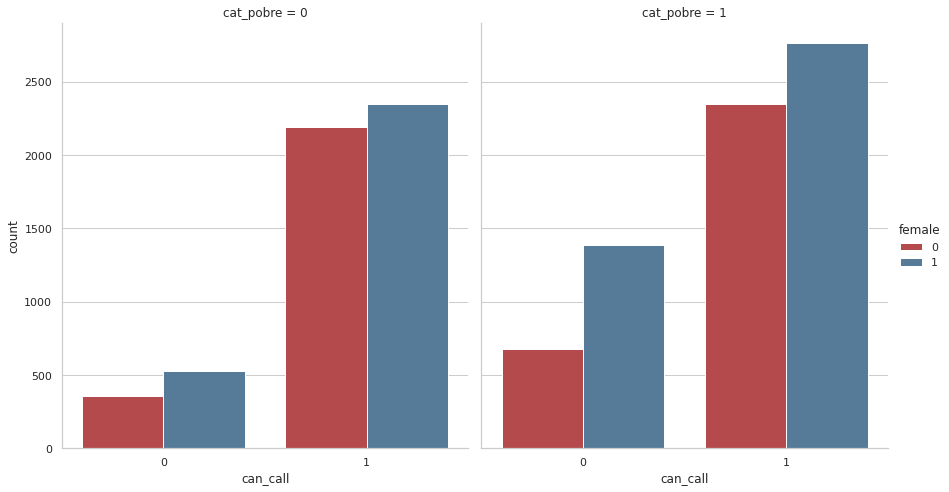

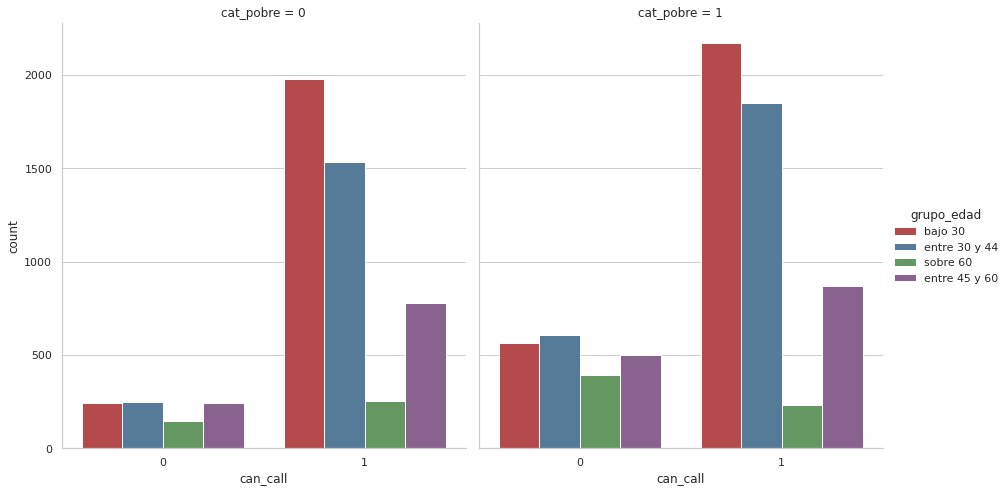

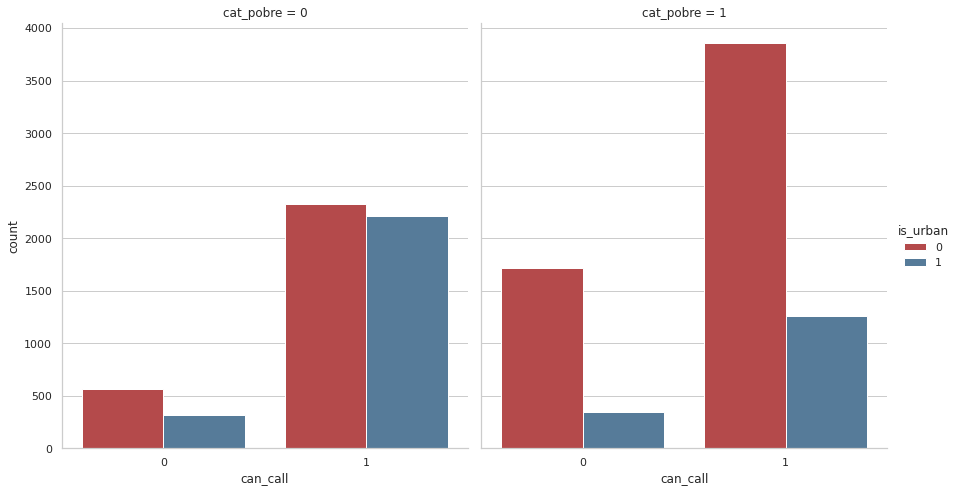

In [ ]:
sns.countplot(x='can_call', hue='female', data=pob1)
sns.catplot(x='can_call', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='can_call', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='can_call', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

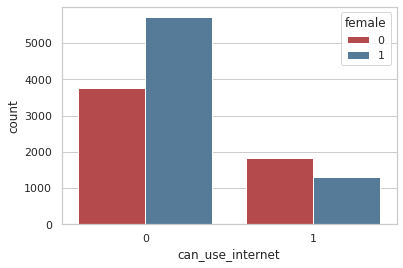

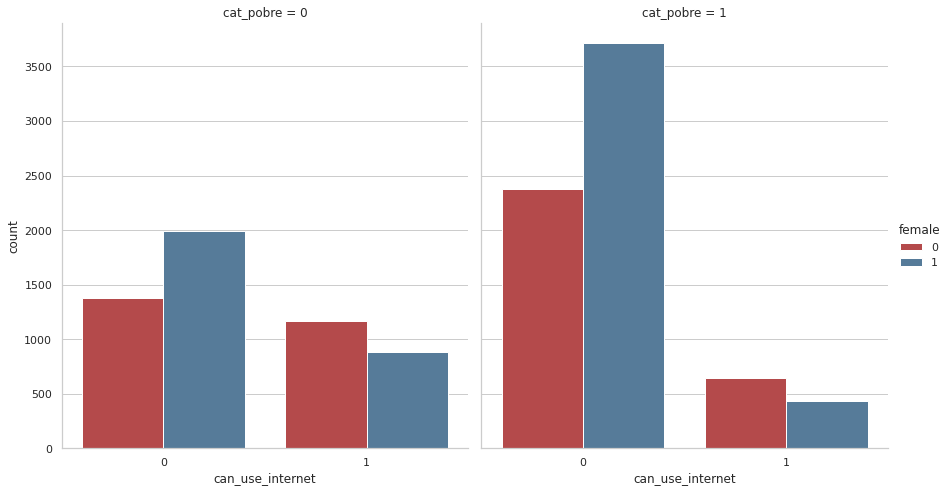

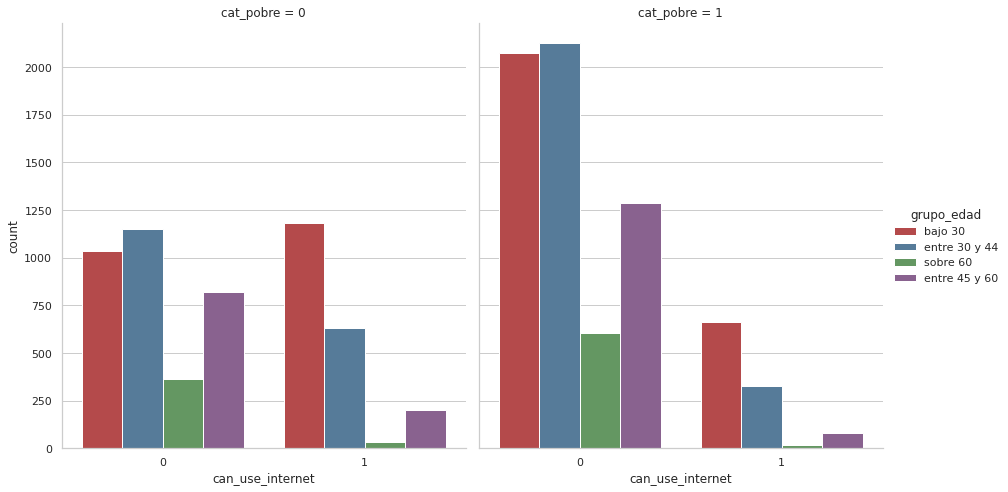

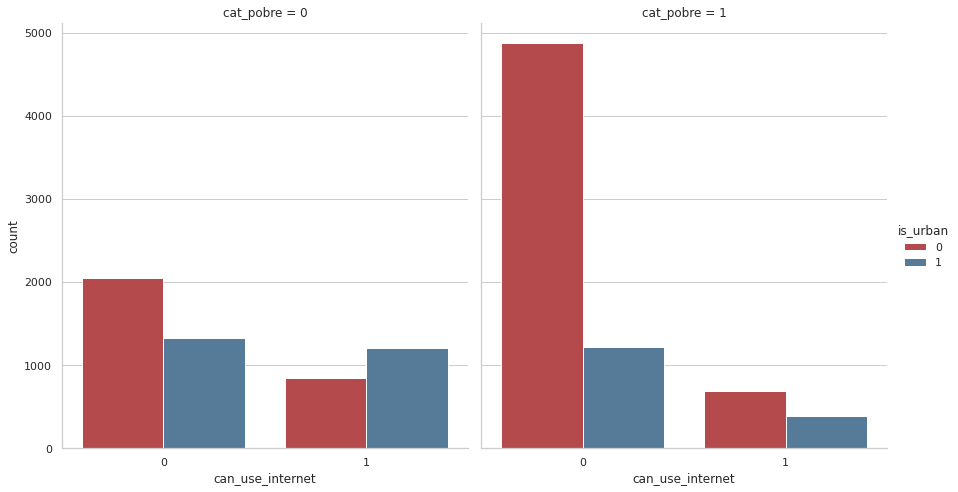

In [ ]:
sns.countplot(x='can_use_internet', hue='female', data=pob1)
sns.catplot(x='can_use_internet', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='can_use_internet', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='can_use_internet', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

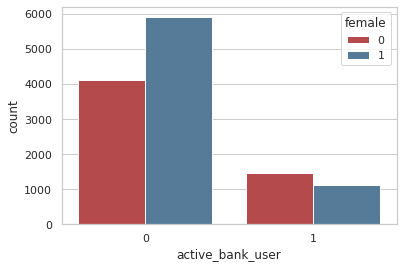

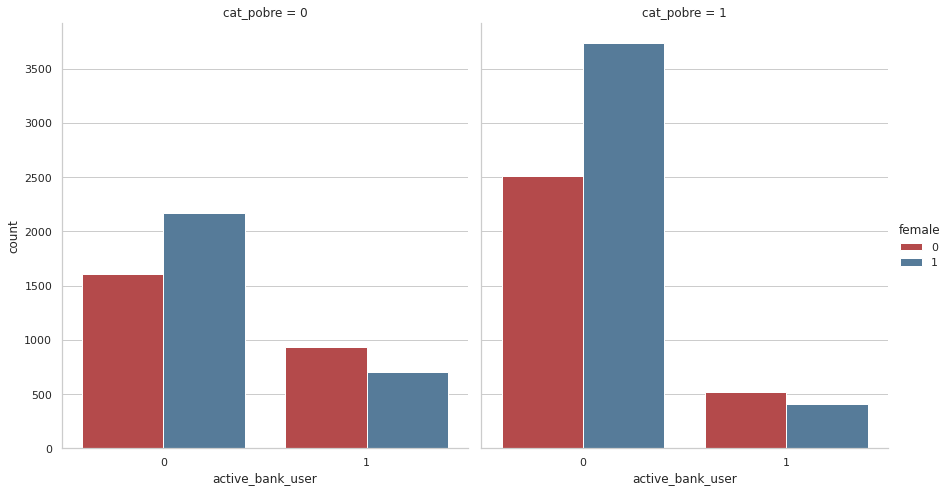

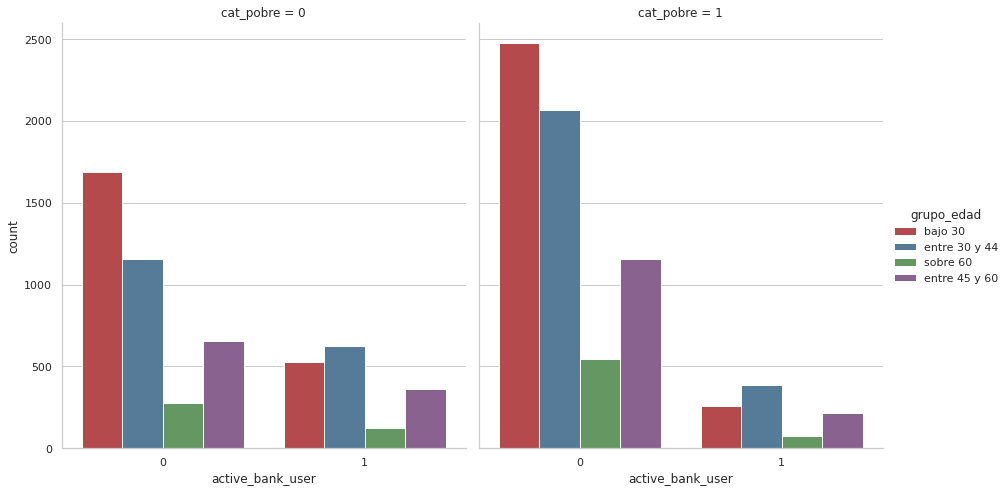

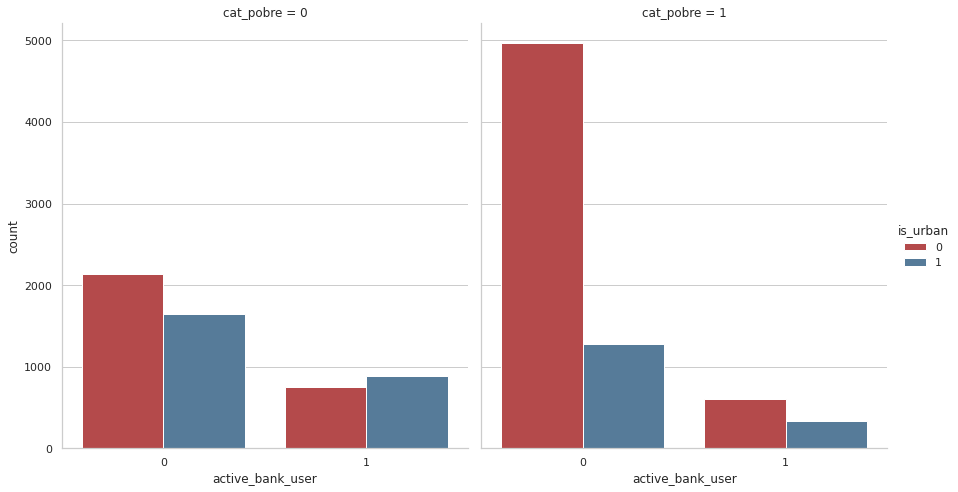

In [ ]:
sns.countplot(x='active_bank_user', hue='female', data=pob1)
sns.catplot(x='active_bank_user', hue="female", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='active_bank_user', hue="grupo_edad", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)
sns.catplot(x='active_bank_user', hue="is_urban", col="cat_pobre", data = pob1, kind="count", height=7, aspect=.9)

#Modelado
###Label Encoder







In [ ]:
pob1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12598 entries, 0 to 12599
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                12598 non-null  object 
 1   is_urban                               12598 non-null  int64  
 2   age                                    12598 non-null  int64  
 3   female                                 12598 non-null  int64  
 4   married                                12598 non-null  int64  
 5   religion                               12598 non-null  object 
 6   relationship_to_hh_head                12598 non-null  object 
 7   education_level                        12598 non-null  int64  
 8   literacy                               12598 non-null  int64  
 9   can_add                                12598 non-null  int64  
 10  can_divide                             12598 non-null  int64  
 11  ca

###Feature Scaling

Realizamos el proceso de Encoding para transformar variables categoricas 

In [ ]:
label_encoder = preprocessing.LabelEncoder()
pob1['country']= label_encoder.fit_transform(pob1['country'])
  
pob1['country'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
pob1['religion']= label_encoder.fit_transform(pob1['religion'])
  
pob1['religion'].unique()

array([2, 3, 4, 1, 0])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
pob1['relationship_to_hh_head']= label_encoder.fit_transform(pob1['relationship_to_hh_head'])
  
pob1['relationship_to_hh_head'].unique()

array([2, 5, 1, 4, 3, 0, 6])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
pob1['employment_category_last_year']= label_encoder.fit_transform(pob1['employment_category_last_year'])
  
pob1['employment_category_last_year'].unique()

array([1, 0, 2, 4, 3])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
pob1['employment_type_last_year']= label_encoder.fit_transform(pob1['employment_type_last_year'])
  
pob1['employment_type_last_year'].unique()

array([1, 0, 4, 3, 2])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
pob1['grupo_edad']= label_encoder.fit_transform(pob1['grupo_edad'])
  
pob1['grupo_edad'].unique()

array([0, 1, 3, 2])

Normalizamos los datos

In [ ]:
def minmax_norm(pob1_input):
    return (pob1 - pob1.min()) / ( pob1.max() - pob1.min())

pob1 = minmax_norm(pob1)

print(pob1)
pob1.head()

         country  is_urban   age  female  married  religion  \
row_id                                                        
0       0.166667       0.0  0.03     1.0      1.0      0.50   
1       0.166667       1.0  0.15     1.0      1.0      0.50   
2       0.000000       0.0  0.05     1.0      1.0      0.75   
3       0.000000       0.0  0.46     0.0      1.0      0.75   
4       0.333333       0.0  0.11     1.0      1.0      1.00   
...          ...       ...   ...     ...      ...       ...   
12595   0.166667       1.0  0.35     0.0      1.0      0.50   
12596   0.333333       0.0  0.75     0.0      0.0      0.25   
12597   1.000000       0.0  0.37     1.0      0.0      1.00   
12598   0.833333       0.0  0.25     0.0      1.0      0.75   
12599   0.333333       1.0  0.09     0.0      0.0      1.00   

        relationship_to_hh_head  education_level  literacy  can_add  ...  \
row_id                                                               ...   
0                      0.333

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability,grupo_edad,cat_pobre
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.166667,0.0,0.03,1.0,1.0,0.50,0.333333,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.1,0.515,0.000000,0.0
1,0.166667,1.0,0.15,1.0,1.0,0.50,0.333333,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.981,0.333333,1.0
2,0.000000,0.0,0.05,1.0,1.0,0.75,0.833333,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.982,0.000000,1.0
3,0.000000,0.0,0.46,0.0,1.0,0.75,0.166667,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.879,1.000000,1.0
4,0.333333,0.0,0.11,1.0,1.0,1.00,0.833333,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.0,0.3,0.796,0.000000,1.0


##PCA

A partir del Analisis de Componentes Principales (PCA) podremos observar que componentes del dataset explican la mayor parte de la varianza en el mismo, a partir de lo cual estudiaremos si es conveniente reducir la dimensionalidad del mismo. 

In [ ]:
pob_1= pob1.drop(columns=['cat_pobre','grupo_edad','poverty_probability'])

Creamos el Pipeline 

In [ ]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(pob_1)

modelo_pca = pca_pipe.named_steps['pca']

Observamos los componentes del mismo

In [ ]:
modelo_pca.components_

array([[ 2.33822748e-02,  1.15657851e-01, -1.60317967e-02, ...,
         8.18739606e-02,  2.25320948e-02,  1.36286657e-01],
       [ 1.18767859e-01, -1.78159346e-01,  4.54513346e-02, ...,
        -2.35297300e-04,  3.82153133e-02,  1.58095105e-02],
       [ 1.38689864e-01,  3.90674754e-02, -6.52498906e-02, ...,
        -1.77343931e-02,  2.41285375e-02,  2.43174625e-02],
       ...,
       [ 3.08449381e-03, -1.79496720e-04, -3.82527006e-04, ...,
        -2.64614562e-02,  5.25919362e-03,  6.32129714e-04],
       [ 4.18861788e-04, -9.00952819e-04, -1.82447456e-03, ...,
        -1.09832642e-02, -1.97669379e-02,  5.25523684e-05],
       [-3.99425970e-04,  3.14427568e-04,  5.80474725e-04, ...,
         1.09774980e-02,  2.79344341e-03, -1.32543026e-02]])

Transformamos el Array en un Dataframe 

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = pob_1.columns,
)

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
0,0.023382,0.115658,-0.016032,-0.107190,-0.048512,0.039938,-0.056840,0.142146,0.210279,0.039977,...,0.055617,0.305980,0.156068,0.251195,0.040441,0.064090,-0.005568,0.081874,0.022532,0.136287
1,0.118768,-0.178159,0.045451,-0.024484,0.097135,0.069604,-0.075495,-0.122626,-0.214871,-0.018478,...,0.040141,-0.034079,-0.131226,0.083889,0.029053,0.124589,0.003221,-0.000235,0.038215,0.015810
2,0.138690,0.039067,-0.065250,0.327472,-0.177171,0.088494,0.171876,0.041141,0.065371,0.010931,...,-0.021007,-0.137994,-0.236010,0.133526,-0.015585,0.081149,0.036620,-0.017734,0.024129,0.024317
3,-0.122384,-0.032285,0.040522,0.244130,0.118559,-0.052999,0.089277,-0.065719,-0.110491,-0.033091,...,0.098372,0.379627,0.263685,0.096673,0.075998,0.005464,-0.065225,0.071522,0.004318,0.060575
4,-0.134026,0.043210,-0.040075,-0.284578,-0.040757,-0.053809,-0.058713,0.097189,0.155724,0.055287,...,-0.022553,-0.175178,0.014191,-0.223999,-0.011636,-0.096584,0.090946,-0.020340,-0.028516,-0.045137
5,0.000500,0.233913,-0.012055,0.276663,0.239568,-0.030455,0.154522,0.058324,0.050867,0.062087,...,0.041859,-0.126352,0.182093,-0.289979,0.038189,0.145868,0.058308,0.004774,0.046825,-0.009906
6,0.079461,0.082561,0.001701,-0.112952,-0.199018,0.015720,-0.091637,-0.027823,-0.154130,-0.076982,...,-0.032236,0.005473,0.010245,0.048782,-0.023516,-0.015278,-0.030403,-0.002642,-0.002133,0.017433
7,-0.051677,0.389411,0.005524,0.246029,-0.090386,0.014365,0.020780,-0.067316,-0.072635,-0.069397,...,-0.006441,0.029694,-0.145884,0.163906,-0.006984,-0.038197,-0.064857,-0.011999,-0.011458,-0.000609
8,0.157915,0.210582,0.022499,-0.136798,-0.569121,0.032892,-0.193094,-0.029534,-0.203680,-0.054909,...,-0.024668,-0.048680,0.166861,-0.101795,-0.018939,-0.003405,0.011358,0.005638,-0.003452,0.017853
9,0.096660,0.328183,0.046698,-0.172066,0.329970,-0.010045,-0.089638,-0.072827,-0.172636,0.011999,...,-0.004977,0.021337,-0.078555,0.083270,-0.005394,0.066249,-0.024326,-0.007745,0.015129,-0.004483


Revisamos la cantidad de componentes

In [ ]:
modelo_pca.n_components_

58

In [ ]:
np.arange(len(pob_1.columns)) + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

La varianza explicada por cada componente 

In [ ]:
modelo_pca.explained_variance_ratio_

array([1.63369003e-01, 8.26916083e-02, 6.36107766e-02, 5.32759472e-02,
       4.51507230e-02, 3.70051952e-02, 3.51346543e-02, 3.20138566e-02,
       2.96385659e-02, 2.73029312e-02, 2.43316930e-02, 2.30841147e-02,
       2.23875195e-02, 2.15708107e-02, 2.07605283e-02, 1.97610673e-02,
       1.89303778e-02, 1.83964544e-02, 1.73281058e-02, 1.65846220e-02,
       1.44878990e-02, 1.34097395e-02, 1.28206302e-02, 1.25643112e-02,
       1.15894133e-02, 1.14069242e-02, 1.11083390e-02, 1.07637860e-02,
       1.02311388e-02, 9.98016331e-03, 9.44671983e-03, 9.17223004e-03,
       8.93890439e-03, 8.39961328e-03, 7.96344186e-03, 7.52256322e-03,
       7.08964843e-03, 6.55574868e-03, 5.99067149e-03, 5.67392298e-03,
       4.97800847e-03, 3.50815924e-03, 3.43013768e-03, 3.29209182e-03,
       3.05962313e-03, 2.62243279e-03, 2.48345291e-03, 2.11285617e-03,
       1.83041632e-03, 1.62943378e-03, 1.37892895e-03, 1.29860592e-03,
       4.00889242e-04, 3.22574268e-04, 8.87984071e-05, 4.17195064e-05,
      

Creamos graficos para visualizar la varianza explicada por cada componente

<BarContainer object of 58 artists>

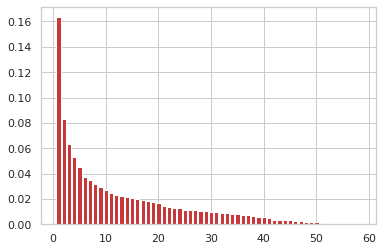

In [ ]:
plt.bar(x=np.arange(len(pob_1.columns)) + 1,height=modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.63369003e-01 8.26916083e-02 6.36107766e-02 5.32759472e-02
 4.51507230e-02 3.70051952e-02 3.51346543e-02 3.20138566e-02
 2.96385659e-02 2.73029312e-02 2.43316930e-02 2.30841147e-02
 2.23875195e-02 2.15708107e-02 2.07605283e-02 1.97610673e-02
 1.89303778e-02 1.83964544e-02 1.73281058e-02 1.65846220e-02
 1.44878990e-02 1.34097395e-02 1.28206302e-02 1.25643112e-02
 1.15894133e-02 1.14069242e-02 1.11083390e-02 1.07637860e-02
 1.02311388e-02 9.98016331e-03 9.44671983e-03 9.17223004e-03
 8.93890439e-03 8.39961328e-03 7.96344186e-03 7.52256322e-03
 7.08964843e-03 6.55574868e-03 5.99067149e-03 5.67392298e-03
 4.97800847e-03 3.50815924e-03 3.43013768e-03 3.29209182e-03
 3.05962313e-03 2.62243279e-03 2.48345291e-03 2.11285617e-03
 1.83041632e-03 1.62943378e-03 1.37892895e-03 1.29860592e-03
 4.00889242e-04 3.22574268e-04 8.87984071e-05 4.

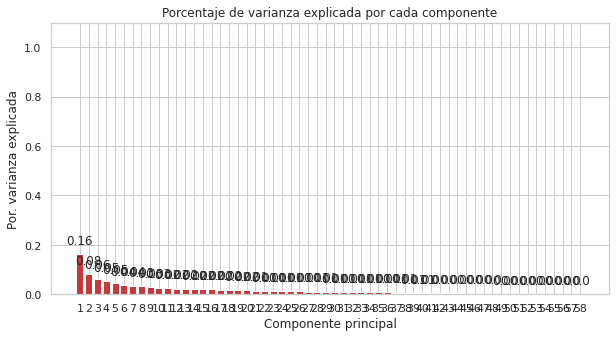

In [ ]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)
# texto
for x, y in zip(np.arange(len(pob_1.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
prop_varianza_acum

array([0.163369  , 0.24606061, 0.30967139, 0.36294733, 0.40809806,
       0.44510325, 0.48023791, 0.51225176, 0.54189033, 0.56919326,
       0.59352495, 0.61660907, 0.63899659, 0.6605674 , 0.68132793,
       0.70108899, 0.72001937, 0.73841583, 0.75574393, 0.77232855,
       0.78681645, 0.80022619, 0.81304682, 0.82561113, 0.83720055,
       0.84860747, 0.85971581, 0.8704796 , 0.88071074, 0.8906909 ,
       0.90013762, 0.90930985, 0.91824875, 0.92664837, 0.93461181,
       0.94213437, 0.94922402, 0.95577977, 0.96177044, 0.96744436,
       0.97242237, 0.97593053, 0.97936067, 0.98265276, 0.98571238,
       0.98833482, 0.99081827, 0.99293113, 0.99476154, 0.99639098,
       0.9977699 , 0.99906851, 0.9994694 , 0.99979197, 0.99988077,
       0.99992249, 0.99996175, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.163369   0.24606061 0.30967139 0.36294733 0.40809806 0.44510325
 0.48023791 0.51225176 0.54189033 0.56919326 0.59352495 0.61660907
 0.63899659 0.6605674  0.68132793 0.70108899 0.72001937 0.73841583
 0.75574393 0.77232855 0.78681645 0.80022619 0.81304682 0.82561113
 0.83720055 0.84860747 0.85971581 0.8704796  0.88071074 0.8906909
 0.90013762 0.90930985 0.91824875 0.92664837 0.93461181 0.94213437
 0.94922402 0.95577977 0.96177044 0.96744436 0.97242237 0.97593053
 0.97936067 0.98265276 0.98571238 0.98833482 0.99081827 0.99293113
 0.99476154 0.99639098 0.9977699  0.99906851 0.9994694  0.99979197
 0.99988077 0.99992249 0.99996175 1.        ]


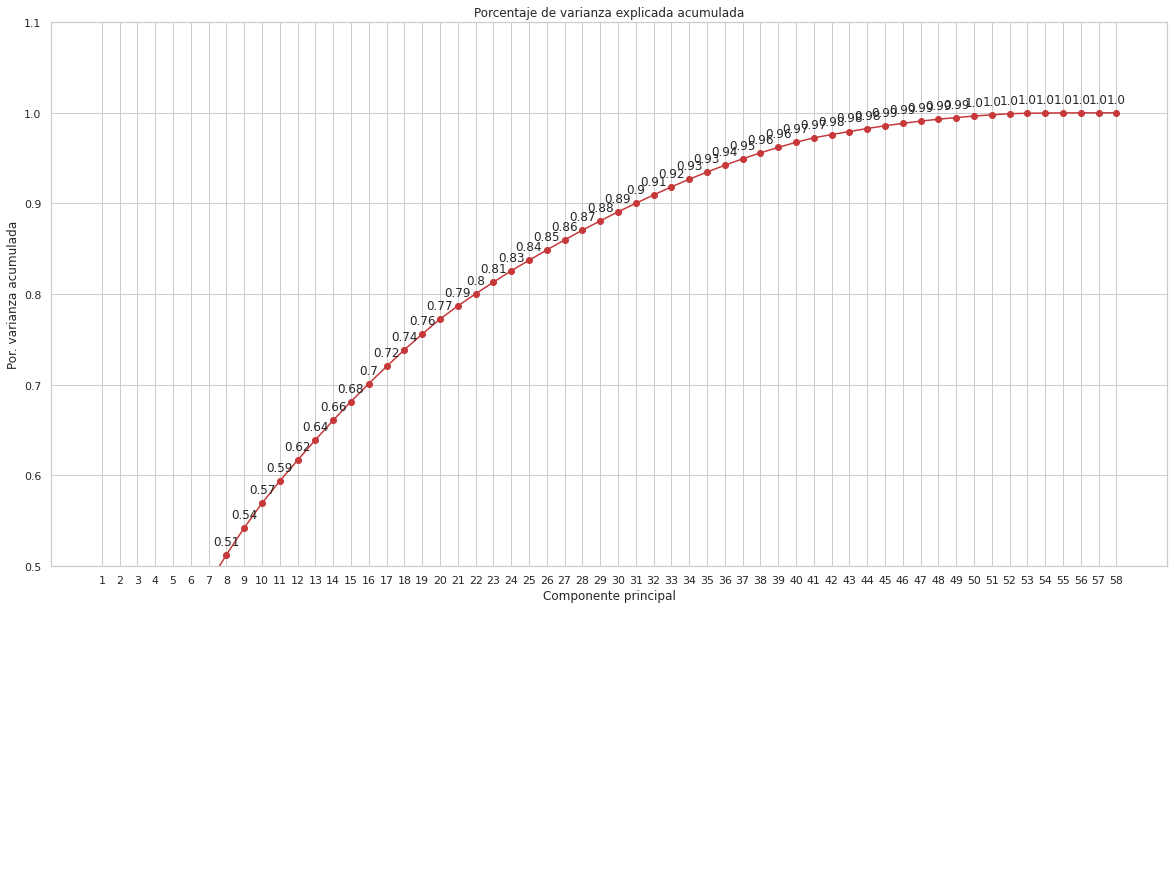

In [ ]:
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.plot(
    np.arange(len(pob_1.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(pob_1.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Despues del analisis de los componentes principales podemos observar que con los primeros 33 componentes podemos explicar mas del 90% de la varianza, aun asi no es suficiente para realizar una reduccion de la dimensionalidad del mismo.

In [ ]:
#Reconstruimos los valores
recostruccion = pca_pipe.inverse_transform(pob_1)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = pob_1.columns,
                    index   = pob_1.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(pob_1.head())

------------------
Valores originales
------------------


,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.791806,1.045308,1.124839,0.733282,0.875154,0.228603,0.363557,1.107591,-0.500187,0.658021,...,0.033648,0.682404,0.392873,-0.319211,-0.026300,0.653860,0.031508,0.313458,0.260133,1.123894
1,0.618347,1.125864,1.135429,0.344947,0.747462,0.434636,0.261448,1.146202,-0.612539,0.812315,...,0.093015,0.539728,0.174237,0.069590,0.012924,0.448844,-0.088740,0.323337,0.199606,1.122569
2,0.477235,1.286305,0.179070,0.340587,1.089319,1.004749,0.595912,1.094528,-0.518935,0.639634,...,-0.066878,0.287441,0.425478,0.055978,-0.062975,0.376318,-0.052577,0.109661,0.117139,0.269820
3,0.689292,0.708567,0.237694,0.123754,1.963454,0.888820,0.343145,1.189048,-0.385577,0.907315,...,0.034686,0.125554,-0.084889,-0.099843,0.007015,0.428184,0.190887,0.046038,0.122391,0.155649
4,0.388304,1.259174,0.212561,0.460372,0.351353,0.869137,0.268550,1.072038,0.001376,1.058873,...,0.239317,0.853203,0.534873,-0.398340,0.169744,0.478203,0.187832,0.149099,0.154104,0.278128


---------------------
Valores reconstruidos
---------------------


,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.166667,0.0,0.03,1.0,1.0,0.50,0.333333,0.333333,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.1
1,0.166667,1.0,0.15,1.0,1.0,0.50,0.333333,0.333333,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0
2,0.000000,0.0,0.05,1.0,1.0,0.75,0.833333,0.333333,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.46,0.0,1.0,0.75,0.166667,0.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.333333,0.0,0.11,1.0,1.0,1.00,0.833333,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.3


Definimos nuestras variables y escalamos los datos por segunda vez con Robust Scaler para eliminar Outliers

In [ ]:
x= pob1.drop(['poverty_probability','grupo_edad','cat_pobre'], axis=1)
y= pob1['cat_pobre']

In [ ]:
scaler= RobustScaler()
x = scaler.fit_transform(x)

In [ ]:
x=pd.DataFrame(x)

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,-0.50,0.0,-0.75,0.0,0.0,-1.0,-0.50,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000
1,-0.50,1.0,-0.15,0.0,0.0,-1.0,-0.50,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.333333
2,-0.75,0.0,-0.65,0.0,0.0,0.0,0.25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.00,-0.333333
3,-0.75,0.0,1.40,-1.0,0.0,0.0,-0.75,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.00,-0.333333
4,-0.25,0.0,-0.35,0.0,0.0,1.0,0.25,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12593,-0.50,1.0,0.85,-1.0,0.0,-1.0,-0.75,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.000000
12594,-0.25,0.0,2.85,-1.0,-1.0,-2.0,-0.75,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.00,-0.333333
12595,0.75,0.0,0.95,0.0,-1.0,1.0,-0.75,0.0,-1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.25,-0.333333
12596,0.50,0.0,0.35,-1.0,0.0,0.0,-0.75,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.00,-0.333333


In [ ]:
y

row_id
0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
12595    1.0
12596    1.0
12597    0.0
12598    1.0
12599    0.0
Name: cat_pobre, Length: 12598, dtype: float64

#Modelos de Clasificacion
###(XGBoost, SVC, KNN)

##XGB Classifier


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
xgb = XGBClassifier(objective='binary:logistic',n_estimators = 100, seed = 42)

In [ ]:
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7404761904761905

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


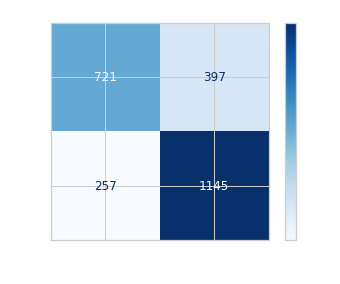

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.64      0.69      1118
         1.0       0.74      0.82      0.78      1402

    accuracy                           0.74      2520
   macro avg       0.74      0.73      0.73      2520
weighted avg       0.74      0.74      0.74      2520



Utilizamos GridSearchCV para buscar los parametros optimos para el modelo 

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(max_depth=4, n_estimators=180, seed=42),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

A continuacion se muestran los mejores hiperparametros para el modelo

In [ ]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 180}

In [ ]:
grid_search.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators=180, seed=42)

Actualizamos los hiperparametros y realizamos el entrenamiento

In [ ]:
xgb = XGBClassifier(learning_rate=0.05, max_depth=6, n_estimators = 180, seed = 42)

In [ ]:
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test, y_pred)

0.7507936507936508

Creamos una matriz de confusion para determinar la precision del modelo clasificando las clases de interes, mas alla del acurracy score.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


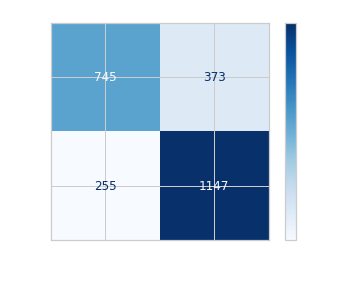

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(xgb, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      1118
         1.0       0.75      0.82      0.79      1402

    accuracy                           0.75      2520
   macro avg       0.75      0.74      0.74      2520
weighted avg       0.75      0.75      0.75      2520



El modelo XGB muestra una accuracy general del 75% , en la clase que nos interesa predecir (cat_pobre=1) es donde mejor performance obtiene.

##SVM

In [ ]:
svc=SVC(C=100, kernel='rbf') 
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy con rbf kernel y C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy con rbf kernel y C=100.0 : 0.6964


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


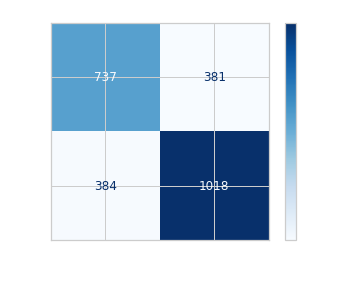

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(svc, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      1118
         1.0       0.73      0.73      0.73      1402

    accuracy                           0.70      2520
   macro avg       0.69      0.69      0.69      2520
weighted avg       0.70      0.70      0.70      2520



Utilizamos Gridsearch con CV

In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, cv=3, scoring='roc_auc')

In [ ]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................................C=1, gamma=1; total time=   6.4s
[CV] END .......................................C=1, gamma=1; total time=   6.4s
[CV] END .......................................C=1, gamma=1; total time=   7.0s
[CV] END .....................................C=1, gamma=0.1; total time=   4.4s
[CV] END .....................................C=1, gamma=0.1; total time=   4.3s
[CV] END .....................................C=1, gamma=0.1; total time=   4.4s
[CV] END ...................................C=1, gamma=0.001; total time=   4.5s
[CV] END ...................................C=1, gamma=0.001; total time=   4.5s
[CV] END ...................................C=1, gamma=0.001; total time=   4.5s
[CV] END ..................................C=1, gamma=0.0001; total time=   5.3s
[CV] END ..................................C=1, gamma=0.0001; total time=   5.2s
[CV] END ..................................C=1, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             scoring='roc_auc', verbose=2)

In [ ]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

Actualizamos los hiperparametros y realizamos el entrenamiento

In [ ]:
vc=SVC(C=1, gamma=0.1) 
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy con rbf kernel y C=1000 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Accuracy con rbf kernel y C=1000 : 0.6964


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


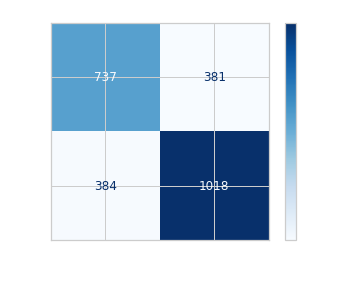

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(svc, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      1118
         1.0       0.73      0.73      0.73      1402

    accuracy                           0.70      2520
   macro avg       0.69      0.69      0.69      2520
weighted avg       0.70      0.70      0.70      2520



El modelo SVC obtiene una accuracy del 70%, no detecta de manera optima la clase minoritaria (cat_pobre= 0), aun asi detecta de mejor manera la clase que nos interesa (cat_pobre=1)

##KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)
ya_pred = knn.predict(x_test)
 
# compute accuracy of the model
knn.score(x_test, y_test)

0.7293650793650793

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


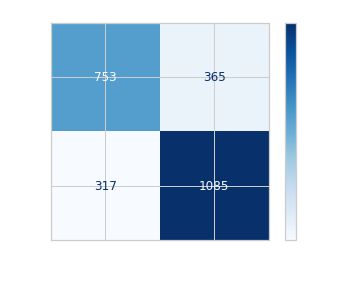

In [ ]:
#Creamos una matriz de confusion 
color = 'white'
matrix = plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      1118
         1.0       0.73      0.73      0.73      1402

    accuracy                           0.70      2520
   macro avg       0.69      0.69      0.69      2520
weighted avg       0.70      0.70      0.70      2520



Utilizaremos, al igual que en los demas algoritmos, GridSearch con Cross Validation para obtener los hiperparametros optimos

In [ ]:
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=3,verbose=1, scoring='roc_auc')

In [ ]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='roc_auc', verbose=1)

In [ ]:
grid.best_params_

{'n_neighbors': 49}

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=49)

Optimizamos los hiperparametros

In [ ]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(x_train, y_train)
ya_pred = knn.predict(x_test)
 
# compute accuracy of the model
knn.score(x_test, y_test)

0.7305555555555555

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


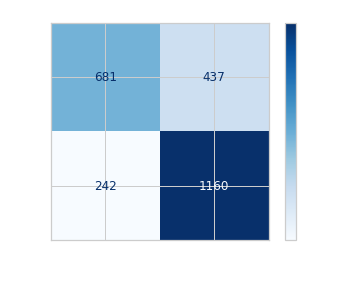

In [ ]:
color = 'white'
matrix = plot_confusion_matrix(knn, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      1118
         1.0       0.73      0.73      0.73      1402

    accuracy                           0.70      2520
   macro avg       0.69      0.69      0.69      2520
weighted avg       0.70      0.70      0.70      2520



##Conclusiones
El modelo que mejor performance muestra es XGB Classifier el cual obtiene un accuracy score del 75% y al observar la perfomance con una matriz de confusion podemos observar que es el que mejor reconoce la clase de mayor interes (cat_pobre=1), ademas es el modelo con mejor F1 Score. El algortimo SVC es el mas equilibrado a la hora de predecir clases, debido a que reconoce mejor que el algoritmo KNN la clase minoritaria pero pierde performance reconociendo la clase de mayor interes. En este caso el algortimo KNN tiene una accuracy general parecido al algoritmo SVC pero al observar la matriz de confusion es notable que reconoce mejor la clase de mayor interes.
Despues de entrenar los algoritmos, optimizar hiperparametros y observar las metricas podemos concluir que el mejor algortimo a utilizar en este caso es XGB Classifier.